In [4]:
import json
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import random

def read_jsonl(file_path):
    data = {}
    with open(file_path, 'r') as file:
        for line in file:
            line_data = json.loads(line)
            data[line_data['qid']] = line_data
    return data

def select_random_qids(data, num_qids):
    return random.sample(list(data.keys()), num_qids)

def select_qids_by_length_topn(data, length_range, n = None):
    selected_qids = []
    for qid, item in data.items():
        for window in item['relevant_windows']:
            start, end = window
            length = end - start
            if length_range[0] <= length <= length_range[1]:
                selected_qids.append(qid)
                break  # 假设每个 qid 只需要被选取一次
    return selected_qids[:n]

# def plot_overlaps(gt_data, pred_data, qids_to_plot):
    matched_data = [(gt, pred_data[gt_qid]) for gt_qid, gt in gt_data.items() if gt_qid in pred_data and gt_qid in qids_to_plot]

    fig, ax = plt.subplots(len(matched_data), 1, figsize=(10, 1 * len(matched_data)))
    if len(matched_data) == 1:
        ax = [ax]

    for i, (gt, pred) in enumerate(matched_data):
        gt_windows = gt['relevant_windows']
        pred_windows = pred['pred_relevant_windows']

        for gw in gt_windows:
            rect = patches.Rectangle((gw[0], 0), gw[1]-gw[0], 1, linewidth=1, edgecolor='g', facecolor='none')
            ax[i].add_patch(rect)

        # for pw in pred_windows:
        if pred_windows:  # 确保 pred_windows 不为空
            pw = pred_windows[0] 
            rect = patches.Rectangle((pw[0], 0), pw[1]-pw[0], 1, linewidth=1, edgecolor='r', facecolor='none')
            ax[i].add_patch(rect)
            pw = pred_windows[1]
            rect = patches.Rectangle((pw[0], 0), pw[1]-pw[0], 1, linewidth=1, edgecolor='y', facecolor='none')
            ax[i].add_patch(rect)
            pw = pred_windows[2]
            rect = patches.Rectangle((pw[0], 0), pw[1]-pw[0], 1, linewidth=1, edgecolor='b', facecolor='none')
            ax[i].add_patch(rect)

        ax[i].set_xlim(0, max(max(gt_windows, key=lambda x: x[1])[1], max(pred_windows, key=lambda x: x[1])[1]))
        ax[i].set_ylim(0, 1.5)
        ax[i].set_title(f"qid: {gt['qid']}; Query: {gt['query']}")

    plt.tight_layout()
    plt.show()

def plot_overlaps(gt_data, pred_data, qids_to_plot, separate_subplots=False):
    matched_data = [(gt, pred_data[gt_qid]) for gt_qid, gt in gt_data.items() if gt_qid in pred_data and gt_qid in qids_to_plot]

    if separate_subplots:
        for i, (gt, pred) in enumerate(matched_data):
            fig, ax = plt.subplots(1, 1, figsize=(10, 1))
            gt_windows = gt['relevant_windows']
            pred_windows = pred['pred_relevant_windows']

            for gw in gt_windows:
                rect = patches.Rectangle((gw[0], 0), gw[1]-gw[0], 1, linewidth=1, edgecolor='g', facecolor='none')
                ax.add_patch(rect)

            if pred_windows:  # Ensure pred_windows is not empty
                for j, pw in enumerate(pred_windows[:3]):
                    colors = ['r', 'y', 'b']
                    rect = patches.Rectangle((pw[0], 0), pw[1]-pw[0], 1, linewidth=1, edgecolor=colors[j], facecolor='none')
                    ax.add_patch(rect)

            ax.set_xlim(0, max(max(gt_windows, key=lambda x: x[1])[1], max(pred_windows, key=lambda x: x[1])[1]))
            ax.set_ylim(0, 1.5)
            ax.set_title(f"qid: {gt['qid']}; Query: {gt['query']}")

            plt.tight_layout()
            plt.show()
    else:
        fig, ax = plt.subplots(len(matched_data), 1, figsize=(10, 1 * len(matched_data)))
        if len(matched_data) == 1:
            ax = [ax]

        for i, (gt, pred) in enumerate(matched_data):
            gt_windows = gt['relevant_windows']
            pred_windows = pred['pred_relevant_windows']

            for gw in gt_windows:
                rect = patches.Rectangle((gw[0], 0), gw[1]-gw[0], 1, linewidth=1, edgecolor='g', facecolor='none')
                ax[i].add_patch(rect)

            if pred_windows:  # Ensure pred_windows is not empty
                for j, pw in enumerate(pred_windows[:3]):
                    colors = ['r', 'y', 'b']
                    rect = patches.Rectangle((pw[0], 0), pw[1]-pw[0], 1, linewidth=1, edgecolor=colors[j], facecolor='none')
                    ax[i].add_patch(rect)

            ax[i].set_xlim(0, max(max(gt_windows, key=lambda x: x[1])[1], max(pred_windows, key=lambda x: x[1])[1]))
            ax[i].set_ylim(0, 1.5)
            ax[i].set_title(f"qid: {gt['qid']}; Query: {gt['query']}")

        plt.tight_layout()
        plt.show()

In [5]:
# 选数据集
# tacos
# gt_file = 'data/tacos/test.jsonl'
# pred_file = 'results_tacos/tacos-video_tef-exp-332121-ndum_50-nprom_2_10/MR_test_submission.jsonl'

# qvhighlight
gt_file = 'data/highlight_val_release.jsonl'
pred_file = 'results/hl-video_tef-exp-332121-ndum_45-nprom_1_10/best_hl_val_preds.jsonl'

# charades
# gt_file = 'data/charades_sta/charades_sta_test_tvr_format.jsonl'
# pred_file = 'results_charadesSTA/charadesSTA-video_tef-exp-332121-ndum_45-nprom_2_10/hl_test_submission.jsonl'

gt_data = read_jsonl(gt_file)
pred_data = read_jsonl(pred_file)

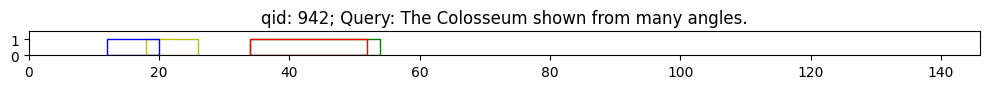

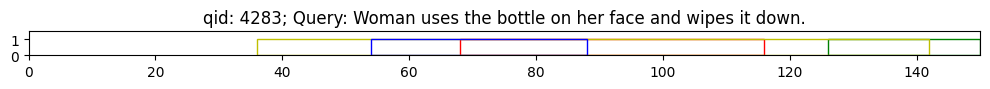

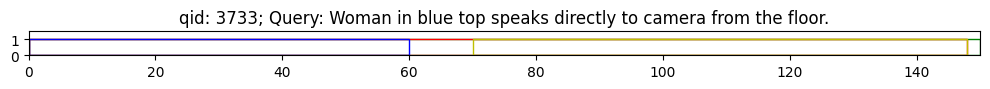

In [13]:
# 从真实值数据中随机选择 QID
num_qids_to_plot = 3  # 可以修改为想要可视化的 QID 数量
qids_to_plot = select_random_qids(gt_data, num_qids_to_plot)

# 可视化重叠
plot_overlaps(gt_data, pred_data, qids_to_plot, True)

In [28]:
# 选择长度符合要求的 QID
length_range = (0, 10) 
# length_range = (30, 60) 
# length_range = (60, 90) 
# length_range = (10, 150) 
qids_to_plot = select_qids_by_length_topn(gt_data, length_range, 20)
print(qids_to_plot)
# 可视化重叠
plot_overlaps(gt_data, pred_data, qids_to_plot, True)

AttributeError: 'list' object has no attribute 'items'

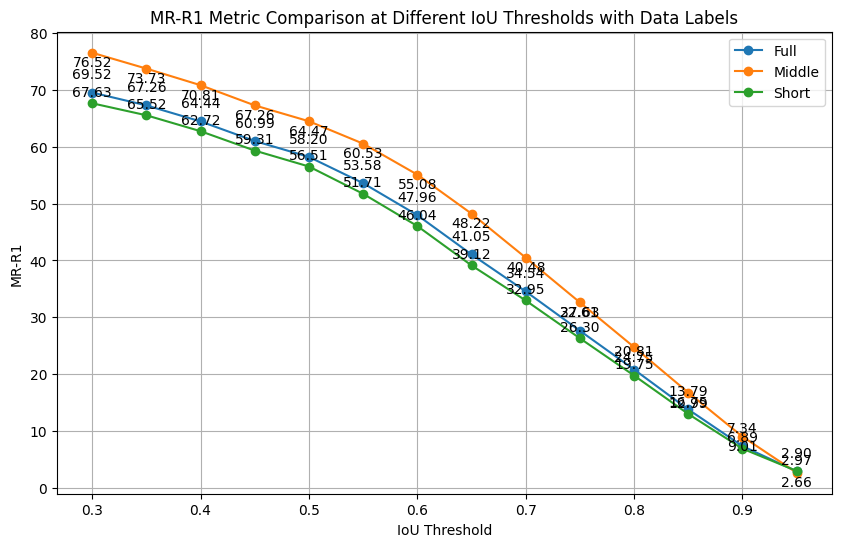

In [21]:
import matplotlib.pyplot as plt
import json

# Reload the JSON file as the execution state was reset
file_path = 'results_charadesSTA/charadesSTA-video_tef-exp-332121-ndum_45-nprom_2_10/hl_test_submission_metrics.json'
with open(file_path, 'r') as file:
    data = json.load(file)

# Extracting the MR-R1 data for 'long', 'middle', 'short' at different IoU thresholds
iou_thresholds = list(data['short']['MR-R1'].keys())
mr_r1_full = [data['full']['MR-R1'][iou] for iou in iou_thresholds]
# mr_r1_long = [data['long']['MR-R1'][iou] for iou in iou_thresholds]
mr_r1_middle = [data['middle']['MR-R1'][iou] for iou in iou_thresholds]
mr_r1_short = [data['short']['MR-R1'][iou] for iou in iou_thresholds]

# Convert IoU thresholds to float for plotting
iou_thresholds_float = [float(iou) for iou in iou_thresholds]

# Creating the plot with data labels
plt.figure(figsize=(10, 6))

plt.plot(iou_thresholds_float, mr_r1_full, label='Full', marker='o')
for i, txt in enumerate(mr_r1_full):
    plt.annotate(f"{txt:.2f}", (iou_thresholds_float[i], mr_r1_full[i]), textcoords="offset points", xytext=(0,10), ha='center')

# Plotting with data labels for 'Long'
# plt.plot(iou_thresholds_float, mr_r1_long, label='Long', marker='o')
# for i, txt in enumerate(mr_r1_long):
#     plt.annotate(f"{txt:.2f}", (iou_thresholds_float[i], mr_r1_long[i]), textcoords="offset points", xytext=(0,0), ha='center')

# Plotting with data labels for 'Middle'
plt.plot(iou_thresholds_float, mr_r1_middle, label='Middle', marker='o')
for i, txt in enumerate(mr_r1_middle):
    plt.annotate(f"{txt:.2f}", (iou_thresholds_float[i], mr_r1_middle[i]), textcoords="offset points", xytext=(0,-10), ha='center')

# Plotting with data labels for 'Short'
plt.plot(iou_thresholds_float, mr_r1_short, label='Short', marker='o')
for i, txt in enumerate(mr_r1_short):
    plt.annotate(f"{txt:.2f}", (iou_thresholds_float[i], mr_r1_short[i]), textcoords="offset points", xytext=(0,5), ha='center')

plt.xlabel('IoU Threshold')
plt.ylabel('MR-R1')
plt.title('MR-R1 Metric Comparison at Different IoU Thresholds with Data Labels')
plt.legend()
plt.grid(True)
plt.show()


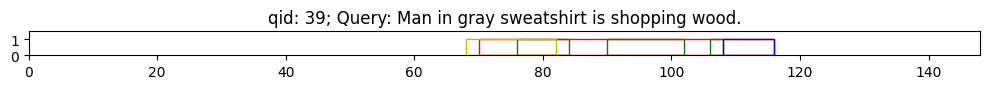

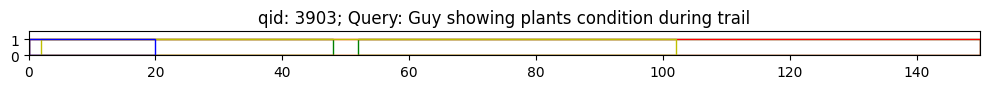

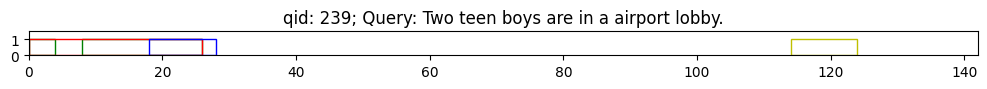

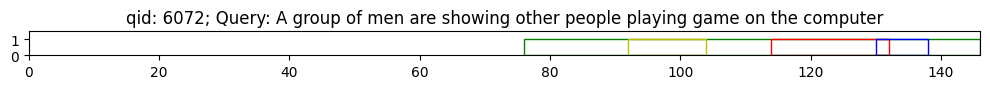

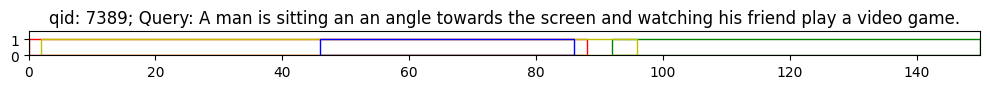

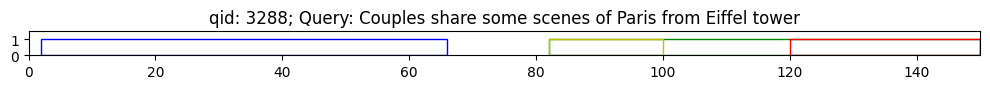

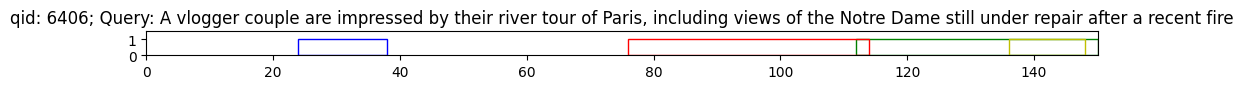

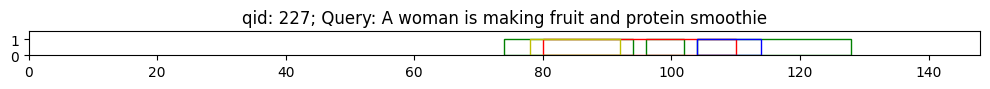

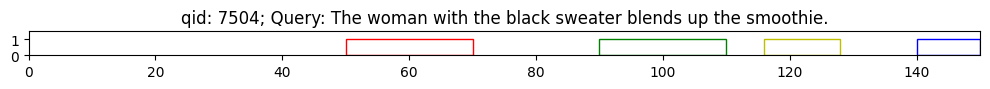

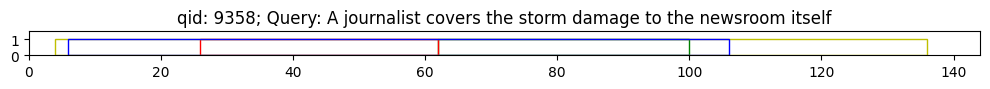

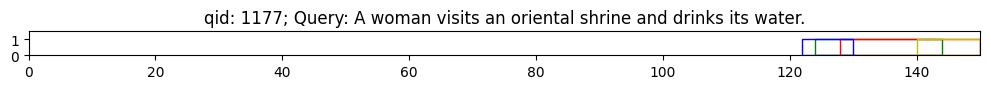

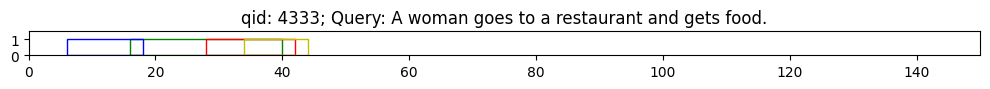

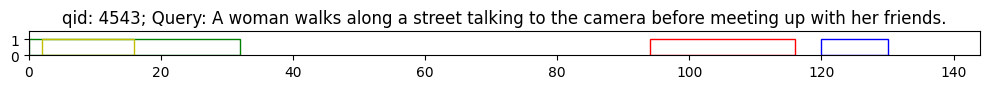

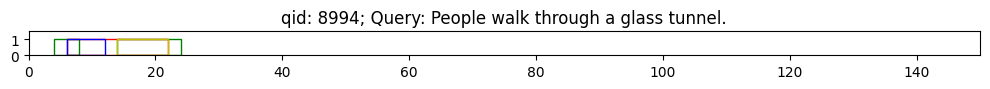

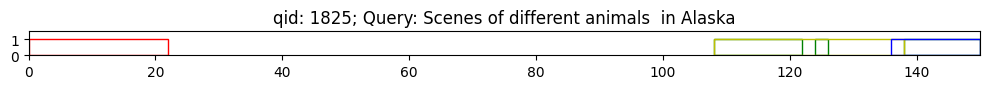

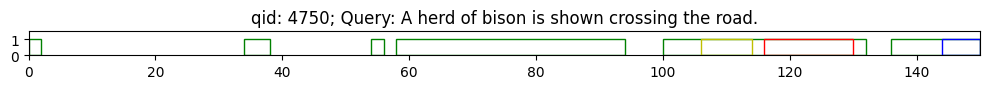

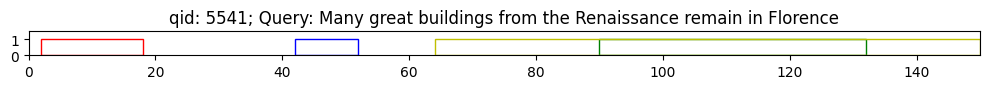

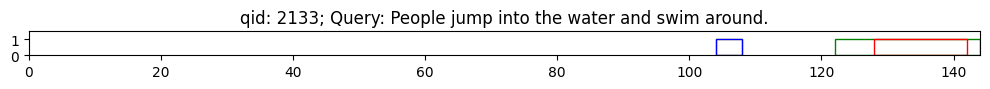

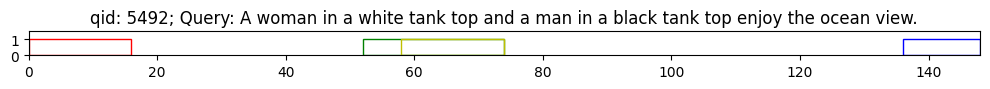

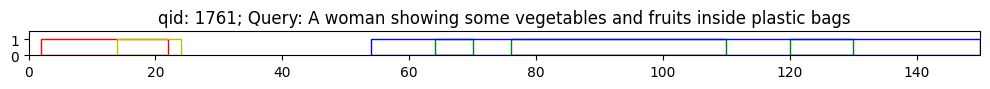

In [7]:
# 有两个read_jsonl函数，使用时需要注意
plot_overlaps(gt_data, pred_data, n['0.7'][-20:], True)

In [12]:
import json
import cv2
import os
from PIL import Image

# Function to read a JSON Lines file
def read_jsonl(file_path):
    with open(file_path, 'r') as file:
        return [json.loads(line) for line in file]

# Read the ground truth and prediction files
gt_data = read_jsonl('data/highlight_val_release.jsonl')
pred_data = read_jsonl('results/hl-video_tef-exp-332121-ndum_45-nprom_1_10/hl_val_submission.jsonl')

# Function to extract frames from a video
def extract_frames(video_path, times, output_folder):
    # video_path = f"/home/zhuocao/zhuocao/lab/CGDETR/features/videos/{video_id}.mp4"  
    print(f"Extracting frames from video {video_path}")
    cap = cv2.VideoCapture(video_path)
    
    for time in times:
        cap.set(cv2.CAP_PROP_POS_MSEC, time * 1000)  # Convert time to milliseconds
        success, frame = cap.read()
        print(success)
        if success:
            frame_filename = f"{output_folder}/{time}.jpg"
            cv2.imwrite(frame_filename, frame)
    
    cap.release()

# Function to process a single video
def process_video(qid, gt_data, pred_data, gt_start_output_folder, pred_start_output_folder):
    # Find the corresponding entries in the ground truth and prediction data
    gt_entry = next((item for item in gt_data if item['qid'] == qid), None)
    pred_entry = next((item for item in pred_data if item['qid'] == qid), None)
    vid = gt_entry['vid']
    print(f"Processing QID {qid} for video {vid}...")

    if not gt_entry or not pred_entry:
        print(f"QID {qid} not found in either ground truth or prediction data.")
        return

    # Extract relevant moments from ground truth and predictions
    gt_moments = gt_entry['relevant_windows']
    pred_moments = pred_entry['pred_relevant_windows']

    # Select the predicted moment with the highest confidence
    # pred_moment = max(pred_moments, key=lambda x: x[2])[:2]  # Taking only start and end time
    pred_moment = pred_moments[0][:2]

    # Define the times to extract frames from (GT start times and predicted start time)
    gt_start_time = [moment[0] for moment in gt_moments]
    # times_to_extract.append(pred_moment[0])
    predicted_start_time = pred_moment[0]
    print(f"Times to extract: {gt_start_time}")
    print(f"Predicted start time: {predicted_start_time}")

    # Assuming the video file is named as "<vid>.mp4"
    video_path = f"/home/zhuocao/zhuocao/lab/CGDETR/features/videos/{vid}.mp4"
    print(f"Extracting frames from video {vid}...")

    # Create output folder if it doesn't exist
    os.makedirs(gt_start_output_folder, exist_ok=True)
    os.makedirs(pred_start_output_folder, exist_ok=True)

    # Extract and save the frames
    extract_frames(video_path, gt_start_time, gt_start_output_folder)
    extract_frames(video_path, [predicted_start_time], pred_start_output_folder)
    return video_path

# Function to uniformly extract frames from a video
def extract_uniform_frames(video_path, num_frames, output_folder):
    cap = cv2.VideoCapture(video_path)
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    fps = cap.get(cv2.CAP_PROP_FPS)
    duration = total_frames / fps

    frame_indices = [int((duration / num_frames) * i * fps) for i in range(num_frames)]
    frame_indices.sort()  # Sort the frame indices in chronological order
    extracted_frames = []

    for frame_idx in frame_indices:
        cap.set(cv2.CAP_PROP_POS_FRAMES, frame_idx)
        success, frame = cap.read()
        if success:
            frame_filename = f"{output_folder}/{frame_idx}.jpg"
            cv2.imwrite(frame_filename, frame)
            extracted_frames.append(frame_filename)

    cap.release()
    return extracted_frames

# Function to merge frames into a single image
def merge_frames(frames, output_filename):
    images = [Image.open(frame) for frame in frames]
    widths, heights = zip(*(i.size for i in images))

    # max_width = max(widths)
    # total_height = sum(heights)
    max_height = max(heights)
    total_width = sum(widths)

    new_im = Image.new('RGB', (total_width, max_height))

    x_offset = 0
    for im in images:
        new_im.paste(im, (x_offset, 0))
        x_offset += im.size[0]

    new_im.save(output_filename)

# Modified function to merge frames into a single image with two rows
def merge_frames_two_rows(uniform_frames, key_frames, output_filename):
    # Load all images
    uniform_images = [Image.open(frame) for frame in uniform_frames]
    key_images = [Image.open(frame) for frame in key_frames]

    # Resize images to 480p (640x480)
    uniform_images_resized = [im.resize((640, 480)) for im in uniform_images]
    key_images_resized = [im.resize((640, 480)) for im in key_images]

    # Determine the size of the final image
    total_width = max(15, len(key_images)) * 640  # Maximum number of frames in a row
    total_height = 480 * 2  # Two rows

    new_im = Image.new('RGB', (total_width, total_height))

    # Paste uniform frames in the first row
    x_offset = 0
    for im in uniform_images_resized:
        new_im.paste(im, (x_offset, 0))
        x_offset += im.size[0]

    # Paste key frames in the second row
    x_offset = 0
    for im in key_images_resized:
        new_im.paste(im, (x_offset, 480))  # Start pasting in the second row
        x_offset += im.size[0]

    new_im.save(output_filename)

# QID list to process
qid_list = n['0.5']

# Process each video in the qid list
for qid in qid_list:
    video_path = process_video(qid, gt_data, pred_data, \
                               f"results/hl-video_tef-exp-332121-ndum_45-nprom_1_10/result_visualization/{qid}/gt_st_frame_{qid}", \
                                f"results/hl-video_tef-exp-332121-ndum_45-nprom_1_10/result_visualization/{qid}/pre_st_frames_{qid}")
    # Extract uniform frames
    uniform_frames_folder = f"results/hl-video_tef-exp-332121-ndum_45-nprom_1_10/result_visualization/{qid}/uniform_frames_qid_{qid}"
    os.makedirs(uniform_frames_folder, exist_ok=True)
    uniform_frames = extract_uniform_frames(video_path, 15, uniform_frames_folder)

    # # Merge uniform frames with keyframes
    # key_frames_folder = f"results/hl-video_tef-exp-332121-ndum_45-nprom_1_10/result_visualization/{qid}/extracted_frames_qid_{qid}"
    # key_frames = [os.path.join(key_frames_folder, frame) for frame in os.listdir(key_frames_folder) if frame.endswith('.jpg')]
    # all_frames = sorted(key_frames + uniform_frames)  # Sort by frame time

    # Merge and save the final image
    final_image_path = f"results/hl-video_tef-exp-332121-ndum_45-nprom_1_10/result_visualization/{qid}/merged_image_qid_{qid}.jpg"
    merge_frames(uniform_frames, final_image_path)
    # merge_frames_two_rows(uniform_frames, key_frames, final_image_path)



KeyError: '0.5'

In [6]:
## 可视化预测结果与gt的overlaps
import numpy as np
import json
from standalone_eval.utils import compute_average_precision_detection, \
    compute_temporal_iou_batch_cross, compute_temporal_iou_batch_paired, load_jsonl, get_ap

def read_jsonl(file_path):
    with open(file_path, 'r') as file:
        return [json.loads(line) for line in file]
    
def negative_qid(submission, ground_truth, iou_thds=np.linspace(0.3, 0.95, 14)):
    """If a predicted segment has IoU >= iou_thd with one of the 1st GT segment, we define it positive"""
    iou_thds = [float(f"{e:.2f}") for e in iou_thds]
    pred_qid2window = {d["qid"]: d["pred_relevant_windows"][0][:2] for d in submission}  # :2 rm scores
    gt_qid2window = {}
    negative_qids = {str(thd): [] for thd in iou_thds}  # Initialize an empty list for each IoU threshold
    for d in ground_truth:
        cur_gt_windows = d["relevant_windows"]
        cur_qid = d["qid"]
        cur_max_iou_idx = 0
        if len(cur_gt_windows) > 0:  # select the GT window that has the highest IoU
            cur_ious = compute_temporal_iou_batch_cross(
                np.array([pred_qid2window[cur_qid]]), np.array(d["relevant_windows"])
            )[0]
            cur_max_iou_idx = np.argmax(cur_ious)
        gt_qid2window[cur_qid] = cur_gt_windows[cur_max_iou_idx]

    qids = list(pred_qid2window.keys())
    pred_windows = np.array([pred_qid2window[k] for k in qids]).astype(float)
    gt_windows = np.array([gt_qid2window[k] for k in qids]).astype(float)
    pred_gt_iou = compute_temporal_iou_batch_paired(pred_windows, gt_windows)

    for thd in iou_thds:
        negative_qids[str(thd)] = [qids[i] for i in range(len(qids)) if pred_gt_iou[i] < thd]

    return negative_qids

def categorize_qids_by_iou(submission, ground_truth):
    """Categorize qids based on their IoU values into different ranges."""
    pred_qid2window = {d["qid"]: d["pred_relevant_windows"][0][:2] for d in submission}
    gt_qid2window = {}
    iou_ranges = {(i/10, (i+1)/10): [] for i in range(10)}  # Create IoU ranges

    for d in ground_truth:
        cur_gt_windows = d["relevant_windows"]
        cur_qid = d["qid"]
        cur_max_iou_idx = 0
        if len(cur_gt_windows) > 0:
            cur_ious = compute_temporal_iou_batch_cross(
                np.array([pred_qid2window[cur_qid]]), np.array(d["relevant_windows"])
            )[0]
            cur_max_iou_idx = np.argmax(cur_ious)
        gt_qid2window[cur_qid] = cur_gt_windows[cur_max_iou_idx]

    qids = list(pred_qid2window.keys())
    pred_windows = np.array([pred_qid2window[k] for k in qids]).astype(float)
    gt_windows = np.array([gt_qid2window[k] for k in qids]).astype(float)
    pred_gt_iou = compute_temporal_iou_batch_paired(pred_windows, gt_windows)

    for i, qid in enumerate(qids):
        iou = pred_gt_iou[i]
        for range_start, range_end in iou_ranges:
            if range_end == 1.0:
                if range_start <= iou <= range_end:
                    iou_ranges[(range_start, range_end)].append(qid)
                    break
            elif range_start <= iou < range_end:
                iou_ranges[(range_start, range_end)].append(qid)
                break

    return iou_ranges

def plot_overlaps(gt_data, pred_data, qids_to_plot, separate_subplots=False):
    """Plot the overlaps between the ground truth and predicted windows for a set of qids."""
    matched_data = [(gt, pred_data[gt_qid]) for gt_qid, gt in gt_data.items() if gt_qid in pred_data and gt_qid in qids_to_plot]

    if separate_subplots:
        for i, (gt, pred) in enumerate(matched_data):
            fig, ax = plt.subplots(1, 1, figsize=(10, 1))
            gt_windows = gt['relevant_windows']
            pred_windows = pred['pred_relevant_windows']

            for gw in gt_windows:
                rect = patches.Rectangle((gw[0], 0), gw[1]-gw[0], 1, linewidth=1, edgecolor='g', facecolor='none')
                ax.add_patch(rect)

            if pred_windows:  # Ensure pred_windows is not empty
                for j, pw in enumerate(pred_windows[:3]):
                    colors = ['r', 'y', 'b']
                    rect = patches.Rectangle((pw[0], 0), pw[1]-pw[0], 1, linewidth=1, edgecolor=colors[j], facecolor='none')
                    ax.add_patch(rect)

            ax.set_xlim(0, max(max(gt_windows, key=lambda x: x[1])[1], max(pred_windows, key=lambda x: x[1])[1]))
            ax.set_ylim(0, 1.5)
            ax.set_title(f"qid: {gt['qid']}; Query: {gt['query']}")

            plt.tight_layout()
            plt.show()
    else:
        fig, ax = plt.subplots(len(matched_data), 1, figsize=(10, 1 * len(matched_data)))
        if len(matched_data) == 1:
            ax = [ax]

        for i, (gt, pred) in enumerate(matched_data):
            gt_windows = gt['relevant_windows']
            pred_windows = pred['pred_relevant_windows']

            for gw in gt_windows:
                rect = patches.Rectangle((gw[0], 0), gw[1]-gw[0], 1, linewidth=1, edgecolor='g', facecolor='none')
                ax[i].add_patch(rect)

            if pred_windows:  # Ensure pred_windows is not empty
                for j, pw in enumerate(pred_windows[:3]):
                    colors = ['r', 'y', 'b']
                    rect = patches.Rectangle((pw[0], 0), pw[1]-pw[0], 1, linewidth=1, edgecolor=colors[j], facecolor='none')
                    ax[i].add_patch(rect)

            ax[i].set_xlim(0, max(max(gt_windows, key=lambda x: x[1])[1], max(pred_windows, key=lambda x: x[1])[1]))
            ax[i].set_ylim(0, 1.5)
            ax[i].set_title(f"qid: {gt['qid']}; Query: {gt['query']}")

        plt.tight_layout()
        plt.show()

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import os

def read_jsonl_Plot(file_path):
    data = {}
    with open(file_path, 'r') as file:
        for line in file:
            line_data = json.loads(line)
            data[line_data['qid']] = line_data
    return data

# 需要修改成可以返回图片的版本
def plot_overlaps_and_save(gt_data, pred_data, qids_to_plot, output_folder, separate_subplots=False):
    """Plot the overlaps between the ground truth and predicted windows for a set of qids and save to a folder."""
    matched_data = [(gt, pred_data[gt_qid]) for gt_qid, gt in gt_data.items() if gt_qid in pred_data and gt_qid in qids_to_plot]

    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    for i, (gt, pred) in enumerate(matched_data):
        fig, ax = plt.subplots(1, 1, figsize=(10, 1))
        gt_windows = gt['relevant_windows']
        pred_windows = pred['pred_relevant_windows']

        for gw in gt_windows:
            rect = patches.Rectangle((gw[0], 0), gw[1]-gw[0], 1, linewidth=1, edgecolor='g', facecolor='none')
            ax.add_patch(rect)

        if pred_windows:
            for j, pw in enumerate(pred_windows[:3]):
                colors = ['r', 'y', 'b']
                rect = patches.Rectangle((pw[0], 0), pw[1]-pw[0], 1, linewidth=1, edgecolor=colors[j], facecolor='none')
                ax.add_patch(rect)

        ax.set_xlim(0, max(max(gt_windows, key=lambda x: x[1])[1], max(pred_windows, key=lambda x: x[1])[1]))
        ax.set_ylim(0, 1.5)
        ax.set_title(f"qid: {gt['qid']}; Query: {gt['query']}")

        plt.tight_layout()
        plt.savefig(os.path.join(output_folder, f"qid_{gt['qid']}.png"))
        plt.close(fig)


# Read the ground truth and prediction files for n
# QV
gt_data = read_jsonl('data/highlight_val_release.jsonl')
pred_data = read_jsonl('results/hl-video_tef-exp-332121-ndum_45-nprom_1_10/hl_val_submission.jsonl')
# n = negative_qid(pred_data, gt_data) # 小于各种iou的qids

# charades
# gt_data = read_jsonl('data/charades_sta/charades_sta_test_tvr_format.jsonl')
# pred_data = read_jsonl('results_charadesSTA/charadesSTA-video_tef-exp-332121-ndum_45-nprom_2_10/hl_test_submission.jsonl')  

# tacos
# gt_data = read_jsonl('data/tacos/test.jsonl')
# pred_data = read_jsonl('results_tacos/tacos-video_tef-exp-332121-ndum_50-nprom_2_10/MR_test_submission.jsonl')

## 找出每段iou范围内的qids
n = categorize_qids_by_iou(pred_data, gt_data)

# Read the ground truth and prediction files for plotting
# QV
Pred_data_plot = read_jsonl_Plot('results/hl-video_tef-exp-332121-ndum_45-nprom_1_10/hl_val_submission.jsonl')
GT_data_plot = read_jsonl_Plot('data/highlight_val_release.jsonl')

# charades
# Pred_data_plot = read_jsonl_Plot('results_charadesSTA/charadesSTA-video_tef-exp-332121-ndum_45-nprom_2_10/hl_test_submission.jsonl')
# GT_data_plot = read_jsonl_Plot('data/charades_sta/charades_sta_test_tvr_format.jsonl')

# tacos
# Pred_data_plot = read_jsonl_Plot('results_tacos/tacos-video_tef-exp-332121-ndum_50-nprom_2_10/MR_test_submission.jsonl')
# GT_data_plot = read_jsonl_Plot('data/tacos/test.jsonl')
n

{(0.0, 0.1): [3359,
  10029,
  3403,
  342,
  5584,
  6213,
  7002,
  4691,
  8052,
  4283,
  8312,
  8628,
  298,
  4707,
  4758,
  9899,
  158,
  3603,
  8108,
  7622,
  9367,
  3378,
  4973,
  9471,
  8792,
  9035,
  6469,
  7332,
  7567,
  9267,
  3864,
  6643,
  5914,
  7627,
  853,
  5043,
  7061,
  8401,
  9954,
  1183,
  7044,
  3307,
  10050,
  3173,
  3229,
  5392,
  4608,
  3026,
  825,
  3215,
  10289,
  4219,
  8075,
  1717,
  436,
  9283,
  8661,
  222,
  7432,
  9052,
  8287,
  4839,
  4080,
  4856,
  6992,
  3731,
  1626,
  7707,
  2600,
  3129,
  5468,
  2411,
  10267,
  8605,
  3416,
  3513,
  4763,
  5217,
  9597,
  8594,
  9712,
  7850,
  2862,
  2545,
  5667,
  5114,
  6836,
  580,
  7188,
  7412,
  3779,
  8560,
  8220,
  1859,
  2969,
  9214,
  4099,
  6749,
  7046,
  8750,
  5304,
  6241,
  8821,
  322,
  7569,
  5671,
  1849,
  7467,
  1319,
  6192,
  9061,
  9671,
  9980,
  625,
  4785,
  7745,
  4934,
  8478,
  2214,
  5246,
  7654,
  5775,
  32,
  2405,
  23

# 2.26

In [13]:
## 从视频抽取各种frame（起始帧，均匀抽帧）
import cv2
import os
import tqdm 

# Function to extract frames from a video
def extract_frames(video_path, times, output_folder):
    # video_path = f"/home/zhuocao/zhuocao/lab/CGDETR/features/videos/{video_id}.mp4"  
    print(f"Extracting frames from video {video_path}")
    cap = cv2.VideoCapture(video_path)
    
    for time in times:
        cap.set(cv2.CAP_PROP_POS_MSEC, time * 1000)  # Convert time to milliseconds
        success, frame = cap.read()
        print(success)
        if success:
            frame_filename = f"{output_folder}/{time}.jpg"
            cv2.imwrite(frame_filename, frame)
    
    cap.release()

# Function to process a single video
def N_process_video(qid, gt_data, pred_data, gt_start_output_folder, pred_start_output_folder):
    gt_entry = gt_data[qid]
    pred_entry = pred_data[qid]
    
    # Find the corresponding entries in the ground truth and prediction data
    # gt_entry = next((item for item in gt_data if item['qid'] == qid), None)
    # pred_entry = next((item for item in pred_data if item['qid'] == qid), None)
    vid = gt_entry['vid']
    print(f"Processing QID {qid} for video {vid}...")

    if not gt_entry or not pred_entry:
        print(f"QID {qid} not found in either ground truth or prediction data.")
        return

    # Extract relevant moments from ground truth and predictions
    gt_moments = gt_entry['relevant_windows']
    pred_moments = pred_entry['pred_relevant_windows']

    # Select the predicted moment with the highest confidence
    # pred_moment = max(pred_moments, key=lambda x: x[2])[:2]  # Taking only start and end time
    pred_moment = pred_moments[0][:2]

    # Define the times to extract frames from (GT start times and predicted start time)
    gt_start_time = [moment[0] for moment in gt_moments]
    # times_to_extract.append(pred_moment[0])
    predicted_start_time = pred_moment[0]
    print(f"Times to extract: {gt_start_time}")
    print(f"Predicted start time: {predicted_start_time}")

    # Assuming the video file is named as "<vid>.mp4"
    video_path = f"/home/zhuocao/zhuocao/lab/CGDETR/features/videos/{vid}.mp4"
    print(f"Extracting frames from video {vid}...")

    # Create output folder if it doesn't exist
    os.makedirs(gt_start_output_folder, exist_ok=True)
    os.makedirs(pred_start_output_folder, exist_ok=True)

    # Extract and save the frames
    extract_frames(video_path, gt_start_time, gt_start_output_folder)
    extract_frames(video_path, [predicted_start_time], pred_start_output_folder)
    return video_path

# 准备所需结果，每页包含一个query的结果，包括gt和pred的frame，视频的均匀抽帧和时间轴
for iou_range, qids in n.items():
    for qid in qids:
        # Create a folder for the current IoU range
        output_folder = f"results/hl-video_tef-exp-332121-ndum_45-nprom_1_10/result_visualization/{iou_range}"
        if not os.path.exists(output_folder):
            os.makedirs(output_folder)

        # Plot the overlaps between the ground truth and predicted windows
        plot_overlaps_and_save(GT_data_plot, Pred_data_plot, [qid], output_folder, False)

        # Extract uniform frames
        video_path = N_process_video(qid, GT_data_plot, Pred_data_plot, \
                                f"results/hl-video_tef-exp-332121-ndum_45-nprom_1_10/result_visualization/{iou_range}/{qid}/gt_st_frame_{qid}", \
                                f"results/hl-video_tef-exp-332121-ndum_45-nprom_1_10/result_visualization/{iou_range}/{qid}/pre_st_frames_{qid}")
        uniform_frames_folder = f"results/hl-video_tef-exp-332121-ndum_45-nprom_1_10/result_visualization/{iou_range}/{qid}/uniform_frames_qid_{qid}"
        os.makedirs(uniform_frames_folder, exist_ok=True)
        uniform_frames = extract_uniform_frames(video_path, 15, uniform_frames_folder)


Processing QID 3359 for video nY42UppPhhg_210.0_360.0...
Times to extract: [0, 52, 84]
Predicted start time: 26.0
Extracting frames from video nY42UppPhhg_210.0_360.0...
Extracting frames from video /home/zhuocao/zhuocao/lab/CGDETR/features/videos/nY42UppPhhg_210.0_360.0.mp4
True
True
True
Extracting frames from video /home/zhuocao/zhuocao/lab/CGDETR/features/videos/nY42UppPhhg_210.0_360.0.mp4
True
Processing QID 10029 for video pA6Z-qYhSNg_360.0_510.0...
Times to extract: [110]
Predicted start time: 76.0
Extracting frames from video pA6Z-qYhSNg_360.0_510.0...
Extracting frames from video /home/zhuocao/zhuocao/lab/CGDETR/features/videos/pA6Z-qYhSNg_360.0_510.0.mp4
True
Extracting frames from video /home/zhuocao/zhuocao/lab/CGDETR/features/videos/pA6Z-qYhSNg_360.0_510.0.mp4
True
Processing QID 3403 for video GAUdBAL0K5A_210.0_360.0...
Times to extract: [90, 114, 132]
Predicted start time: 58.0
Extracting frames from video GAUdBAL0K5A_210.0_360.0...
Extracting frames from video /home/zhu

In [97]:
## 根据已有的文件制作pdf
from reportlab.lib.pagesizes import letter
from reportlab.pdfgen import canvas
from PIL import Image
import os
from tqdm import tqdm

import os
import re

# 定义一个函数来从文件名中提取数字
def extract_number(filename):
    s = re.findall("\d+", filename)
    return int(s[0]) if s else -1

def add_page_to_pdf(c, width, height, uniform_frames_folder, timeline_image, pred_start_dir, gt_start_dir, GT_data_plot, Pred_data_plot, qid):
    # images = [os.path.join(uniform_frames_folder, f) for f in sorted(os.listdir(uniform_frames_folder)) if f.endswith('.jpg') or f.endswith('.png')]
    images = [os.path.join(uniform_frames_folder, f) for f in sorted(os.listdir(uniform_frames_folder), key=extract_number) if f.endswith('.jpg') or f.endswith('.png')]
    
    # 均匀抽帧的图像水平放置
    for idx, img_path in enumerate(images):
        img = Image.open(img_path)
        img_width, img_height = img.size
        aspect = img_height / float(img_width)
        # 调整图像大小以适应页面宽度
        img_width = width / len(images)  # 假设均匀分布在页面宽度
        img_height = img_width * aspect
        c.drawImage(img_path, idx * img_width, height - img_height, width=img_width, height=img_height, preserveAspectRatio=True)
    
    # 时间轴图像
    timeline = Image.open(timeline_image)
    timeline_width, timeline_height = timeline.size
    aspect = timeline_height / float(timeline_width)
    timeline_width = width  # 时间轴图像占据整个页面宽度
    timeline_height = timeline_width * aspect
    c.drawImage(timeline_image, 0, height - img_height - timeline_height, width=timeline_width, height=timeline_height, preserveAspectRatio=True)
    
    # 预测起始帧
    pred_start_images = [os.path.join(pred_start_dir, f) for f in sorted(os.listdir(pred_start_dir)) if f.endswith('.jpg') or f.endswith('.png')]
    if pred_start_images:
        video_lenght = GT_data_plot[qid]['duration']
        pred_pos = Pred_data_plot[qid]['pred_relevant_windows'][0][0]
        relative_pos = pred_pos / video_lenght
        st_width = width * relative_pos 
        pred_start_image = pred_start_images[0]
        pred_start = Image.open(pred_start_image)
        pred_start_width, pred_start_height = pred_start.size
        aspect = pred_start_height / float(pred_start_width)
        pred_start_width = width / 4  # 假设占据四分之一页面宽度
        pred_start_height = pred_start_width * aspect
        c.drawImage(pred_start_image, st_width, height - img_height - timeline_height - pred_start_height, width=pred_start_width, height=pred_start_height, preserveAspectRatio=True)
    
    # 真实起始帧
    gt_start_images = [os.path.join(gt_start_dir, f) for f in sorted(os.listdir(gt_start_dir)) if f.endswith('.jpg') or f.endswith('.png')]
    for idx, gt_start_image in enumerate(gt_start_images):
        gt_pos = GT_data_plot[qid]['relevant_windows'][idx][0]
        relative_pos = gt_pos / video_lenght
        st_width = width * relative_pos
        gt_start = Image.open(gt_start_image)
        gt_start_width, gt_start_height = gt_start.size
        aspect = gt_start_height / float(gt_start_width)
        gt_start_width = width / 4  # 同上
        gt_start_height = gt_start_width * aspect
        c.drawImage(gt_start_image, st_width, height - img_height - timeline_height - pred_start_height - gt_start_height, width=gt_start_width, height=gt_start_height, preserveAspectRatio=True)
    
    # 给页面添加一个qid，用于搜索
    c.setFont("Helvetica", 12)
    c.drawString(10, 10, f"qid: {qid}")
    c.showPage()

# PDF文件的保存路径
pdf_filename = 'results/hl-video_tef-exp-332121-ndum_45-nprom_1_10/result_visualization/result1.pdf'

# 初始化Canvas
c = canvas.Canvas(pdf_filename, pagesize=(1600,900))
width, height = (1600,900)

GT_data_plot = read_jsonl_Plot('data/highlight_val_release.jsonl')
Pred_data_plot = read_jsonl_Plot('results/hl-video_tef-exp-332121-ndum_45-nprom_1_10/hl_val_submission.jsonl')
# 循环处理每个qid
for iou_range, qids in tqdm(n.items()):
    for qid in tqdm(qids):
        qid_folder = f"results/hl-video_tef-exp-332121-ndum_45-nprom_1_10/result_visualization/{iou_range}"
        uniform_frames_folder = f"{qid_folder}/{qid}/uniform_frames_qid_{qid}"
        timeline_image = f'{qid_folder}/qid_{qid}.png'
        pred_start_dir = f'{qid_folder}/{qid}/pre_st_frames_{qid}'
        gt_start_dir = f'{qid_folder}/{qid}/gt_st_frame_{qid}'
        add_page_to_pdf(c, width, height, uniform_frames_folder, timeline_image, pred_start_dir, gt_start_dir, GT_data_plot, Pred_data_plot, qid)

# 保存PDF文件
c.save()


100%|██████████| 10/10 [01:09<00:00,  6.91s/it]


# 2.27

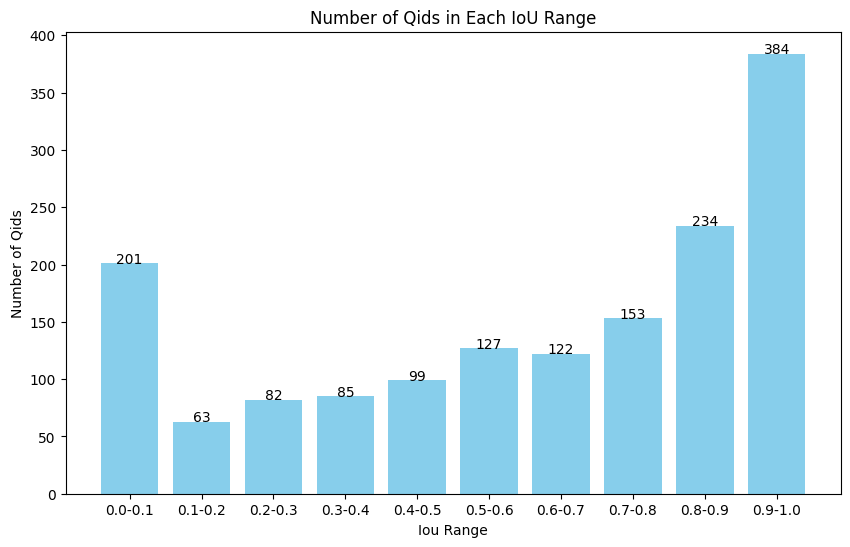

In [36]:
## 统计每个iou范围内的qids数量（over
# 将n用柱状图表示
import matplotlib.pyplot as plt
# 字典的值是列表，列表的长度就是柱状图的高度
# Your dictionary
data = n

# Extract the keys and values from the dictionary
keys = list(data.keys())
keys = [f"{float(k[0]):.1f}-{float(k[1]):.1f}" for k in keys]
values = [len(v) for v in data.values()]

# Create a bar chart
# 修改chart的宽度
plt.figure(figsize=(10, 6))
plt.bar(keys, values)
# 设置bar的颜色
plt.bar(keys, values, color='skyblue')
# 给每个bar添加数值标签
for i, v in enumerate(values):
    plt.text(i, v + 0.1, str(v), ha='center')
# Add labels and title
plt.xlabel('Iou Range')
plt.ylabel('Number of Qids')
plt.title('Number of Qids in Each IoU Range')

# Display the chart
plt.show()


In [3]:
## 统计jsonl文件中唯一的vid有多少个
def count_unique_vids(file_path):
    with open(file_path, 'r') as file:
        data = [json.loads(line) for line in file]
    vids = [d['vid'] for d in data]
    return len(set(vids))

a = count_unique_vids('data/highlight_train_release.jsonl')
b = count_unique_vids('data/highlight_val_release.jsonl')
c = count_unique_vids('data/highlight_test_release.jsonl')
print(a, b, c)

# 统计三个jsonl文件中的vid有多少重合
def count_common_vids(file1, file2, file3):
    with open(file1, 'r') as file:
        data1 = [json.loads(line) for line in file]
    with open(file2, 'r') as file:
        data2 = [json.loads(line) for line in file]
    with open(file3, 'r') as file:
        data3 = [json.loads(line) for line in file]
    vids1 = [d['vid'] for d in data1]
    vids2 = [d['vid'] for d in data2]
    vids3 = [d['vid'] for d in data3]
    # return len(set(vids1) & set(vids2) & set(vids3))
    return len(set(vids1) & set(vids2) & set(vids3)), len(set(vids1) & set(vids2)), len(set(vids1) & set(vids3)), len(set(vids2) & set(vids3))

d = count_common_vids('data/highlight_train_release.jsonl', 'data/highlight_val_release.jsonl', 'data/highlight_test_release.jsonl')
print(d)

## 统计三个jsonl文件中的qid有多少重合
def count_common_qids(file1, file2, file3):
    with open(file1, 'r') as file:
        data1 = [json.loads(line) for line in file]
    with open(file2, 'r') as file:
        data2 = [json.loads(line) for line in file]
    with open(file3, 'r') as file:
        data3 = [json.loads(line) for line in file]
    qids1 = [d['qid'] for d in data1]
    qids2 = [d['qid'] for d in data2]
    qids3 = [d['qid'] for d in data3]
    return len(set(qids1) & set(qids2) & set(qids3)), len(set(qids1) & set(qids2)), len(set(qids1) & set(qids3)), len(set(qids2) & set(qids3))

e = count_common_qids('data/highlight_train_release.jsonl', 'data/highlight_val_release.jsonl', 'data/highlight_test_release.jsonl')
print(e)

7100 1519 1529
(0, 0, 0, 0)
(0, 0, 0, 0)


{'0.3': 77.68, '0.35': 74.65, '0.4': 72.19, '0.45': 68.58, '0.5': 65.81, '0.55': 61.94, '0.6': 57.61, '0.65': 53.55, '0.7': 49.74, '0.75': 44.97, '0.8': 39.87, '0.85': 34.0, '0.9': 24.77, '0.95': 14.58} {'0.3': 46.39, '0.35': 40.26, '0.4': 35.42, '0.45': 30.97, '0.5': 27.87, '0.55': 23.42, '0.6': 21.1, '0.65': 18.52, '0.7': 15.61, '0.75': 13.68, '0.8': 10.97, '0.85': 7.48, '0.9': 4.65, '0.95': 3.29} {'0.3': 35.74, '0.35': 29.74, '0.4': 25.35, '0.45': 20.13, '0.5': 18.32, '0.55': 14.06, '0.6': 12.19, '0.65': 9.94, '0.7': 7.68, '0.75': 6.58, '0.8': 5.1, '0.85': 3.42, '0.9': 2.26, '0.95': 1.61}


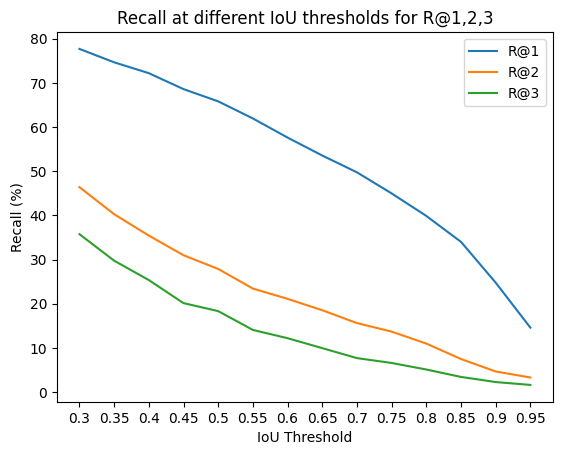

In [37]:
## 计算R@X
def compute_mr_rX(submission, ground_truth, iou_thds=np.linspace(0.3, 0.95, 14), x=0):
    """If a predicted segment has IoU >= iou_thd with one of the 1st GT segment, we define it positive"""
    iou_thds = [float(f"{e:.2f}") for e in iou_thds]
    pred_qid2window = {d["qid"]: d["pred_relevant_windows"][x][:2] for d in submission}  # :2 rm scores
    # gt_qid2window = {d["qid"]: d["relevant_windows"][0] for d in ground_truth}
    gt_qid2window = {}
    for d in ground_truth:
        cur_gt_windows = d["relevant_windows"]
        cur_qid = d["qid"]
        cur_max_iou_idx = 0
        if len(cur_gt_windows) > 0:  # select the GT window that has the highest IoU
            cur_ious = compute_temporal_iou_batch_cross(
                np.array([pred_qid2window[cur_qid]]), np.array(d["relevant_windows"])
            )[0]
            cur_max_iou_idx = np.argmax(cur_ious)
        gt_qid2window[cur_qid] = cur_gt_windows[cur_max_iou_idx]

    qids = list(pred_qid2window.keys())
    pred_windows = np.array([pred_qid2window[k] for k in qids]).astype(float)
    gt_windows = np.array([gt_qid2window[k] for k in qids]).astype(float)
    pred_gt_iou = compute_temporal_iou_batch_paired(pred_windows, gt_windows)
    iou_thd2recall_at_one = {}
    miou_at_one = float(f"{np.mean(pred_gt_iou) * 100:.2f}")
    for thd in iou_thds:
        iou_thd2recall_at_one[str(thd)] = float(f"{np.mean(pred_gt_iou >= thd) * 100:.2f}")
    return iou_thd2recall_at_one, miou_at_one

f, _ = compute_mr_rX(pred_data, gt_data, x = 0)
g, _ = compute_mr_rX(pred_data, gt_data, x = 1)
h, _ = compute_mr_rX(pred_data, gt_data, x = 2)
print(f, g, h)

# 在同一张图中画出f,g,h的折线图
import matplotlib.pyplot as plt
import numpy as np
def plot_mr_rX(data):
    for i in range(3):
        iou_thds = list(data[i].keys())
        recalls = list(data[i].values())
        plt.plot(iou_thds, recalls, label=f"R@{i+1}")
    plt.xlabel('IoU Threshold')
    plt.ylabel('Recall (%)')
    plt.title(f"Recall at different IoU thresholds for R@1,2,3")
    plt.legend()
    plt.show()

plot_mr_rX([f,g,h])

In [38]:
## 计算2选iou大于1选的比例，并找出是哪些qid的2选比1选iou大
def compute_mr_rXY_ratio(submission, ground_truth, x = 2, y = 1):
    """x选大于y选的比例，并找出是哪些qid的x选比y选iou大"""
    predx_qid2window = {d["qid"]: d["pred_relevant_windows"][x-1][:2] for d in submission}  # 第x个预测
    predy_qid2window = {d["qid"]: d["pred_relevant_windows"][y-1][:2] for d in submission}  # 第y个预测
    i = 0 # 计数器, 计算x选比y选大的数量
    qids = []
    for d in ground_truth:
        cur_gt_windows = d["relevant_windows"]
        cur_qid = d["qid"]
        cur_max_iou_idx = 0
        if len(cur_gt_windows) > 0:  # select the GT window that has the highest IoU
            cur_xious = compute_temporal_iou_batch_cross(
                np.array([predx_qid2window[cur_qid]]), np.array(d["relevant_windows"])
            )[0]
            cur_max_iou_idx = np.argmax(cur_xious)
            cur_xiou = cur_xious[0][cur_max_iou_idx]

            cur_max_iou_idx = 0
            cur_yious = compute_temporal_iou_batch_cross(
                np.array([predy_qid2window[cur_qid]]), np.array(d["relevant_windows"])
            )[0]
            cur_max_iou_idx = np.argmax(cur_yious)
            cur_yiou = cur_yious[0][cur_max_iou_idx]
            if cur_xiou > cur_yiou:
                i += 1
                qids.append(cur_qid)
    
    return i/len(ground_truth), qids

i, qids = compute_mr_rXY_ratio(pred_data, gt_data, x = 2, y = 1)
print("2选大于1选: ",i, len(qids))

i, qids1 = compute_mr_rXY_ratio(pred_data, gt_data, x = 3, y = 1)
print("3选大于1选: ",i, len(qids))

## 计算2，3中存在大于1选的iou的比例
def compute_mr_23_ratio(submission, ground_truth, x = 2, y = 3, z = 1):
    """x选大于y选的比例，并找出是哪些qid的x选比y选iou大"""
    predx_qid2window = {d["qid"]: d["pred_relevant_windows"][x-1][:2] for d in submission}  # 第x个预测
    predy_qid2window = {d["qid"]: d["pred_relevant_windows"][y-1][:2] for d in submission}  # 第y个预测
    predz_qid2window = {d["qid"]: d["pred_relevant_windows"][z-1][:2] for d in submission}  # 第z个预测
    i = 0 # 计数器
    qids = []
    for d in ground_truth:
        cur_gt_windows = d["relevant_windows"]
        cur_qid = d["qid"]
        cur_max_iou_idx = 0
        if len(cur_gt_windows) > 0:  # select the GT window that has the highest IoU
            cur_xious = compute_temporal_iou_batch_cross(
                np.array([predx_qid2window[cur_qid]]), np.array(d["relevant_windows"])
            )[0]
            cur_max_iou_idx = np.argmax(cur_xious)
            cur_xiou = cur_xious[0][cur_max_iou_idx]

            cur_max_iou_idx = 0
            cur_yious = compute_temporal_iou_batch_cross(
                np.array([predy_qid2window[cur_qid]]), np.array(d["relevant_windows"])
            )[0]
            cur_max_iou_idx = np.argmax(cur_yious)
            cur_yiou = cur_yious[0][cur_max_iou_idx]
            
            cur_max_iou_idx = 0
            cur_zious = compute_temporal_iou_batch_cross(
                np.array([predz_qid2window[cur_qid]]), np.array(d["relevant_windows"])
            )[0]
            cur_max_iou_idx = np.argmax(cur_zious)
            cur_ziou = cur_zious[0][cur_max_iou_idx] 

            if cur_xiou > cur_ziou or cur_yiou > cur_ziou:
                i += 1
                qids.append(cur_qid)
    
    return i/len(ground_truth), qids

i, qids = compute_mr_23_ratio(pred_data, gt_data, x = 2, y = 3, z = 1)
print("2或3选大于1选: ",i, len(qids))

2选大于1选:  0.2167741935483871 336
3选大于1选:  0.16774193548387098 336
2或3选大于1选:  0.3032258064516129 470


In [39]:
## 性能天花板
def compute_mr_R(submission, ground_truth, iou_thds=np.linspace(0.3, 0.95, 14), x = 2, y = 3, z = 1):
    predx_qid2window = {d["qid"]: d["pred_relevant_windows"][x-1][:2] for d in submission}  # 第x个预测
    predy_qid2window = {d["qid"]: d["pred_relevant_windows"][y-1][:2] for d in submission}  # 第y个预测
    predz_qid2window = {d["qid"]: d["pred_relevant_windows"][z-1][:2] for d in submission}  # 第z个预测
    
    gt_qid2window = {}
    pred_qid2window = {}
    for d in ground_truth:
        cur_gt_windows = d["relevant_windows"]
        cur_qid = d["qid"]
        # x
        curx_max_iou_idx = 0
        if len(cur_gt_windows) > 0:  # select the GT window that has the highest IoU
            cur_xious = compute_temporal_iou_batch_cross(
                np.array([predx_qid2window[cur_qid]]), np.array(d["relevant_windows"])
            )[0]
            curx_max_iou_idx = np.argmax(cur_xious)
            cur_xiou = cur_xious[0][curx_max_iou_idx]
            # y
            cury_max_iou_idx = 0
            cur_yious = compute_temporal_iou_batch_cross(
                np.array([predy_qid2window[cur_qid]]), np.array(d["relevant_windows"])
            )[0]
            cury_max_iou_idx = np.argmax(cur_yious)
            cur_yiou = cur_yious[0][cury_max_iou_idx]
            # z
            curz_max_iou_idx = 0
            cur_zious = compute_temporal_iou_batch_cross(
                np.array([predz_qid2window[cur_qid]]), np.array(d["relevant_windows"])
            )[0]
            curz_max_iou_idx = np.argmax(cur_zious)
            cur_ziou = cur_zious[0][curz_max_iou_idx]
            
            # 找出xyz中最大的及其对应的gt
            max_iou = max(cur_xiou, cur_yiou, cur_ziou)
            pred_qid2window[cur_qid] = predx_qid2window[cur_qid] if max_iou == cur_xiou else predy_qid2window[cur_qid] if max_iou == cur_yiou else predz_qid2window[cur_qid]
            cur_max_iou_idx = curx_max_iou_idx if max_iou == cur_xiou else cury_max_iou_idx if max_iou == cur_yiou else curz_max_iou_idx
            gt_qid2window[cur_qid] = cur_gt_windows[cur_max_iou_idx]
    
    qids = list(pred_qid2window.keys())
    print(qids)
    pred_windows = np.array([pred_qid2window[k] for k in qids]).astype(float)
    gt_windows = np.array([gt_qid2window[k] for k in qids]).astype(float)
    pred_gt_iou = compute_temporal_iou_batch_paired(pred_windows, gt_windows)
    iou_thd2recall_at_one = {}
    miou_at_one = float(f"{np.mean(pred_gt_iou) * 100:.2f}")
    for thd in iou_thds:
        iou_thd2recall_at_one[str(thd)] = float(f"{np.mean(pred_gt_iou >= thd) * 100:.2f}")
    return iou_thd2recall_at_one, miou_at_one, pred_windows, gt_windows

i, _ , pred_win, gt_win= compute_mr_R(pred_data, gt_data)
print(i, _)

[2579, 5071, 5342, 8636, 8749, 2638, 5979, 6223, 8737, 8783, 781, 3359, 3503, 4625, 7803, 8056, 2321, 2343, 5926, 9760, 10029, 10049, 1872, 3389, 8014, 3183, 3407, 3525, 3403, 4508, 5612, 9280, 721, 1870, 2276, 342, 1751, 6083, 7484, 3001, 5584, 6746, 9796, 2585, 3739, 4854, 7218, 8721, 3069, 4275, 7735, 4875, 4887, 6213, 7002, 7555, 2433, 3584, 4023, 1961, 4419, 5915, 1276, 2960, 4792, 8462, 1264, 1505, 635, 5488, 8187, 942, 4691, 8052, 1136, 1874, 5510, 4283, 4548, 7990, 9462, 9774, 2435, 2875, 3938, 8312, 9979, 2658, 3826, 5353, 8341, 8628, 3915, 6240, 298, 2851, 5256, 7527, 8671, 4707, 6337, 7940, 9053, 2132, 3054, 8193, 4758, 6807, 7653, 9692, 9899, 10189, 2244, 5862, 7924, 538, 3834, 5331, 7547, 8370, 255, 5084, 993, 2043, 2125, 1303, 2511, 3793, 7285, 7291, 884, 2253, 5688, 4413, 6831, 7861, 10107, 158, 228, 2798, 1566, 2583, 6117, 5587, 6598, 6863, 9562, 9619, 10254, 3573, 5651, 1271, 5168, 5257, 8444, 548, 1918, 2820, 4468, 5427, 7604, 8008, 41, 76, 6065, 7295, 7581, 10046, 11

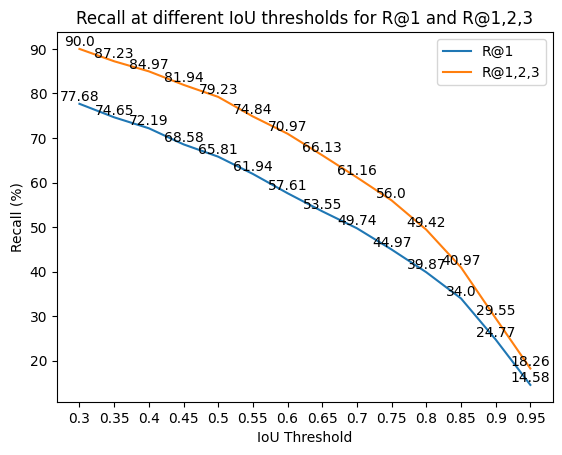

In [40]:
import matplotlib.pyplot as plt
import numpy as np
def plot_mr_rX(data):

    iou_thds = list(data[0].keys())
    recalls = list(data[0].values())
    plt.plot(iou_thds, recalls, label=f"R@1")
    for i, j in zip(iou_thds, recalls):
        plt.text(i, j, f'{j}', ha='center', va='bottom')

    recalls = list(data[1].values())
    plt.plot(iou_thds, recalls, label=f"R@1,2,3")
    for i, j in zip(iou_thds, recalls):
        plt.text(i, j, f'{j}', ha='center', va='bottom')

    plt.xlabel('IoU Threshold')
    plt.ylabel('Recall (%)')
    plt.title(f"Recall at different IoU thresholds for R@1 and R@1,2,3")
    plt.legend()
    plt.show()

plot_mr_rX([f, i])

# 2.29

In [5]:
## 统计train, val, test独有词汇
import json

def load_queries(filename):
    queries = []
    with open(filename, 'r', encoding='utf-8') as file:
        for line in file:
            data = json.loads(line)
            queries.append(data['query'])
    return queries

def get_unique_words(queries):
    words = set()
    for query in queries:
        words.update(query.lower().split())
    return words

# 加载训练集和验证集的查询
train_queries = load_queries('data/highlight_train_release.jsonl')
val_queries = load_queries('data/highlight_val_release.jsonl')
test_queries = load_queries('data/highlight_test_release.jsonl')

# 获取每个集合中的唯一单词
train_words = get_unique_words(train_queries)
val_words = get_unique_words(val_queries)
test_words = get_unique_words(test_queries)

# 找出验证集中独有的单词
val_new_words = val_words - train_words
test_new_words = test_words - train_words
old_words = train_words - val_words - test_words

print(len(val_new_words),"个在验证集中但不在训练集中的词汇:", val_new_words)
print(len(test_new_words),"个在测试集中但不在训练集中的词汇:", test_new_words)
print(len(old_words),"个在训练集中但不在验证集和测试集中的词汇:", old_words)


783 个在验证集中但不在训练集中的词汇: {'clown', 'productive', 'business.', 'further', 'pood;e', 'framing.', "car's", 'burgers', 'riverside', 'overcoat', 'nearly', 'videotaping', 'testicles.', 'gunfire', 'guess', 'photograph', 'maps', 'macarons', 'beans', 'decor', 'quality', 'bear.', 'senator', 'crisps', 'brussel', 'wired', 'wraps.', 'page', 'serious', 'is.', 'quite', 'max', 'nightclub', 'flows', 'applaud', 'for.', 'dispursing', 'tricycle', 'scissors', 'birds.', 'paint', 'filing', 'programs', 'typical', 'pedicure', 'flooding.', 'supension', 'posts', 'jummah', 'graduates', 'rundown', 'orphaned', 'babe', 'energises', 'tortillas.', 'rappers', 'savior', 'beside.', 'biting', 'constitution', 'tones', 'attention.', 'polices', 'planes', 'loaded', '1st', 'clean,', 'fields.', 'cooktop.', 'utter', 'remain', 'packaging', 'sandboarding', 'diffenert', 'zoo', 'backgorund.', 'almost', 'covid.', 'sailors', 'circles.', '94th', 'entertainment', 'super-ripped', 'fastfood', 'celebrity', 'angeles.', 'compartment', 'cacti', 

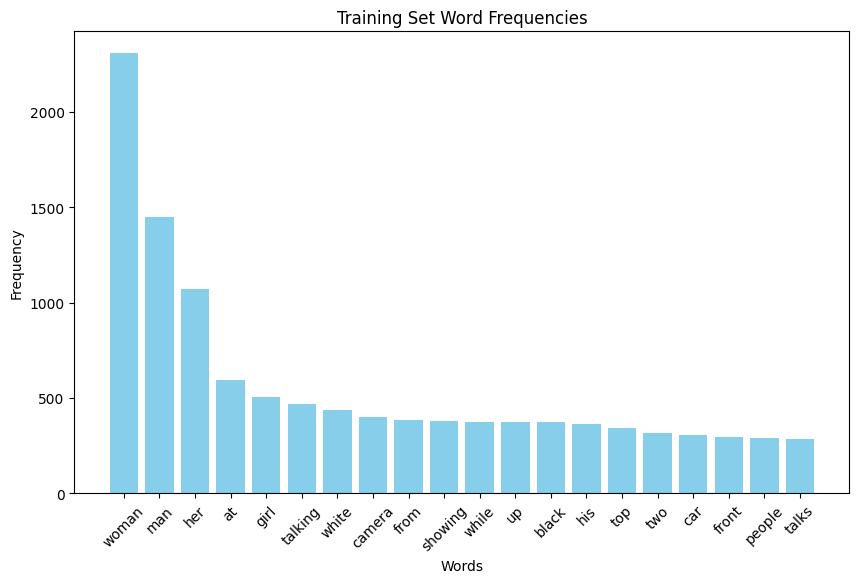

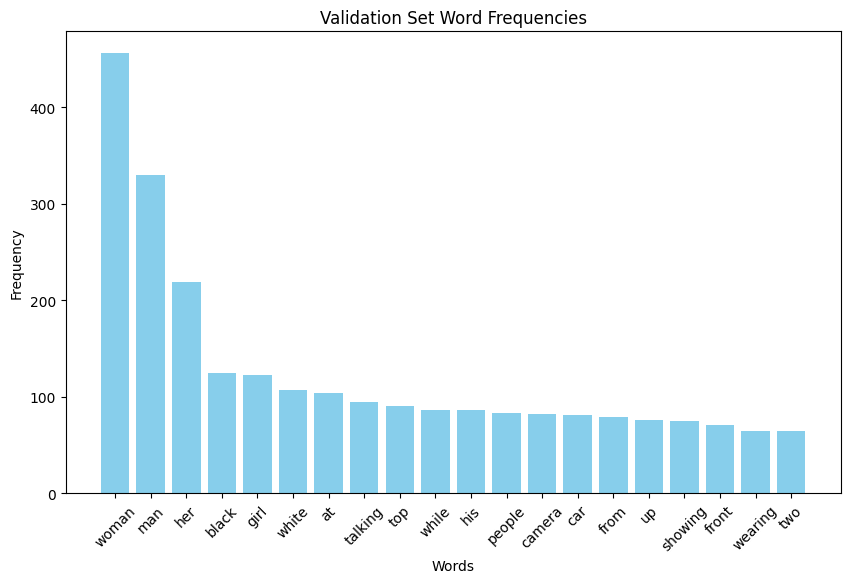

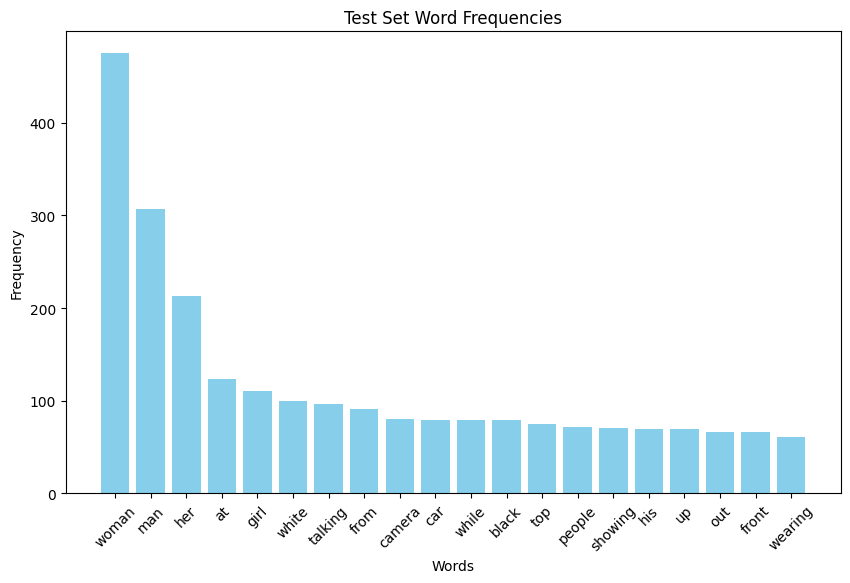

In [2]:
import json
import matplotlib.pyplot as plt
from collections import Counter
import string
## 词频统计 除去stop words
# 定义停用词
stop_words = set(["the", "and", "in", "of", "to", "a", "is", "on", "for", "with", "that", "this", "it", "as", "are", "by", "an"])

def load_and_process_queries(filename):
    queries = []
    with open(filename, 'r', encoding='utf-8') as file:
        for line in file:
            data = json.loads(line)
            # 去除标点符号和转换为小写
            query = data['query'].lower().translate(str.maketrans('', '', string.punctuation))
            queries.extend([word for word in query.split() if word not in stop_words])
    return queries

def plot_word_frequencies(words, title):
    # 计算词频
    word_counts = Counter(words)
    most_common = word_counts.most_common(20)  # 取频率最高的20个词

    # 绘制条形图
    plt.figure(figsize=(10, 6))
    plt.bar(*zip(*most_common), color='skyblue')
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.title(title)
    plt.xticks(rotation=45)
    plt.show()

# 加载和处理数据
train_queries = load_and_process_queries('data/highlight_train_release.jsonl')
val_queries = load_and_process_queries('data/highlight_val_release.jsonl')
test_queries = load_and_process_queries('data/highlight_test_release.jsonl')

# 绘制词频图
plot_word_frequencies(train_queries, 'Training Set Word Frequencies')
plot_word_frequencies(val_queries, 'Validation Set Word Frequencies')
plot_word_frequencies(test_queries, 'Test Set Word Frequencies')


In [11]:
## 量化提升点（二三选正确率很高，一选接近或等于0的情况；）
def compute_case_ratio(submission, ground_truth, iou_thds=np.linspace(0.3, 0.95, 14), x = 2, y = 3, z = 1):
    predx_qid2window = {d["qid"]: d["pred_relevant_windows"][x-1][:2] for d in submission}  # 第x个预测
    predy_qid2window = {d["qid"]: d["pred_relevant_windows"][y-1][:2] for d in submission}  # 第y个预测
    predz_qid2window = {d["qid"]: d["pred_relevant_windows"][z-1][:2] for d in submission}  # 第z个预测
    
    gt_qid2window = {}
    pred_qid2window = {}
    i = 0
    j = 0
    qids = []
    for d in ground_truth:
        cur_gt_windows = d["relevant_windows"]
        cur_qid = d["qid"]
        # x
        curx_max_iou_idx = 0
        if len(cur_gt_windows) > 0:  # select the GT window that has the highest IoU
            cur_xious = compute_temporal_iou_batch_cross(
                np.array([predx_qid2window[cur_qid]]), np.array(d["relevant_windows"])
            )[0]
            curx_max_iou_idx = np.argmax(cur_xious)
            cur_xiou = cur_xious[0][curx_max_iou_idx]
            # y
            cury_max_iou_idx = 0
            cur_yious = compute_temporal_iou_batch_cross(
                np.array([predy_qid2window[cur_qid]]), np.array(d["relevant_windows"])
            )[0]
            cury_max_iou_idx = np.argmax(cur_yious)
            cur_yiou = cur_yious[0][cury_max_iou_idx]
            # z
            curz_max_iou_idx = 0
            cur_zious = compute_temporal_iou_batch_cross(
                np.array([predz_qid2window[cur_qid]]), np.array(d["relevant_windows"])
            )[0]
            curz_max_iou_idx = np.argmax(cur_zious)
            cur_ziou = cur_zious[0][curz_max_iou_idx]
            
            # 找出xyz中最大的及其对应的gt
            max_iou = max(cur_xiou, cur_yiou, cur_ziou)
            pred_qid2window[cur_qid] = predx_qid2window[cur_qid] if max_iou == cur_xiou else predy_qid2window[cur_qid] if max_iou == cur_yiou else predz_qid2window[cur_qid]
            # 如果最大的iou出现在x或y，且z的iou接近0
            # if 0 <= cur_ziou <= 0:
            # if (cur_xiou >= 0.5 and cur_yiou >= 0.5) and cur_ziou <= 0:
            if (cur_xiou >= 0.5 or cur_yiou >= 0.5) and cur_ziou <= 0:
                i += 1
                qids.append(cur_qid)
            j += 1

    return i, j, qids


i, j, qids= compute_case_ratio(pred_data, gt_data)
print(f"{i}/{j}={100*i/j}%, {qids}")

82/1550=5.290322580645161%, [3359, 10029, 5584, 9899, 158, 3603, 7622, 3378, 7567, 3864, 6643, 5914, 853, 7044, 5392, 4608, 3026, 825, 3215, 10289, 4219, 436, 9283, 222, 7432, 8287, 6992, 3731, 2411, 10267, 8605, 8594, 2545, 5667, 5114, 7412, 3779, 6749, 7046, 8750, 6241, 5671, 9061, 9980, 625, 4785, 7745, 4934, 8478, 7654, 4314, 8675, 10006, 4240, 7271, 682, 532, 8294, 2967, 5986, 10137, 687, 4041, 10261, 4705, 617, 4969, 2768, 3088, 6587, 6625, 9028, 471, 6917, 8778, 9638, 6418, 7834, 9770, 2757, 1825, 5492]


In [86]:
## 检验列表中的qid是否在qids中
def check_qids_in_list(qids, qid_list):
    return [qid for qid in qid_list if qid in qids]

qid = [4608,825,10289,4219,436,222,9052,4856,6992,1626,2411,10267]
qids = check_qids_in_list(qid, qids)
print(qids)

[]


In [89]:
## 根据qid找出对应的预测窗口
def find_pred_windows_by_qids(qids, pred_data):
    return [d['pred_relevant_windows'][:3] for d in pred_data if d['qid'] in qids]
x = find_pred_windows_by_qids(qids, pred_data)
x

[[[42.0, 66.0, 0.9979], [132.0, 148.0, 0.8584], [136.0, 148.0, 0.6741]],
 [[50.0, 78.0, 0.9938], [90.0, 112.0, 0.9439], [94.0, 114.0, 0.7436]],
 [[24.0, 40.0, 0.9841], [46.0, 74.0, 0.9712], [52.0, 76.0, 0.6567]]]

In [125]:
## 找出起点的偏移在一定范围的qids，并计数
def find_st_offset_qids(submission, ground_truth, offset_range = 3, x = 1):
    predx_qid2window = {d["qid"]: d["pred_relevant_windows"][x-1][:2] for d in submission}  # 第x个预测

    gt_qid2window = {}
    pred_qid2window = {}
    i = 0
    j = 0
    k = 0
    er_qids = []
    de_qids = []

    for d in ground_truth:
        cur_gt_windows = d["relevant_windows"]
        cur_qid = d["qid"]

        cur_max_iou_idx = 0
        if len(cur_gt_windows) > 0:  # select the GT window that has the highest IoU
            cur_xious = compute_temporal_iou_batch_cross(
                np.array([predx_qid2window[cur_qid]]), np.array(d["relevant_windows"])
            )[0]
            cur_max_iou_idx = np.argmax(cur_xious)
            cur_iou = cur_xious[0][cur_max_iou_idx]

            pred_qid2window[cur_qid] = predx_qid2window[cur_qid]
            gt_qid2window[cur_qid] = cur_gt_windows[cur_max_iou_idx]

            if offset_range - 2 <= predx_qid2window[cur_qid][0] - cur_gt_windows[cur_max_iou_idx][0] <= offset_range and cur_iou >= 0.7:
                i += 1
                er_qids.append(cur_qid)
            
            if offset_range - 2 <= cur_gt_windows[cur_max_iou_idx][0] - predx_qid2window[cur_qid][0] <= offset_range and cur_iou >= 0.7:
                k += 1
                de_qids.append(cur_qid)

            j += 1
    return i, k, j, er_qids, de_qids

i, k, j , er_qids, de_qids= find_st_offset_qids(pred_data, gt_data, offset_range = 5, x = 1)
print(f"{i}/{j}={100*i/j}%, {er_qids}")
print(f"{k}/{j}={100*k/j}%, {de_qids}")

28/1550=1.8064516129032258%, [5979, 3389, 2435, 2583, 548, 10046, 3900, 1999, 8987, 5239, 6480, 1300, 2879, 8900, 4602, 8627, 3253, 4163, 9483, 1800, 8320, 6410, 7299, 5772, 3021, 2698, 775, 8078]
39/1550=2.5161290322580645%, [7803, 3525, 5688, 2798, 7295, 4425, 5703, 6885, 5407, 655, 2540, 4617, 9157, 8981, 6797, 10131, 5623, 9133, 210, 9474, 10082, 9878, 1251, 8216, 522, 1214, 3290, 7001, 953, 1842, 6419, 9548, 6953, 8135, 353, 3370, 10173, 7203, 193]


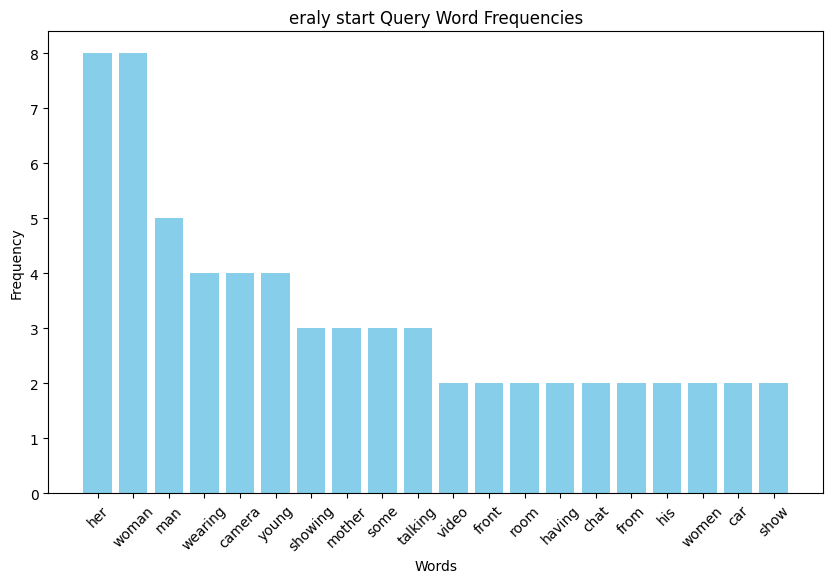

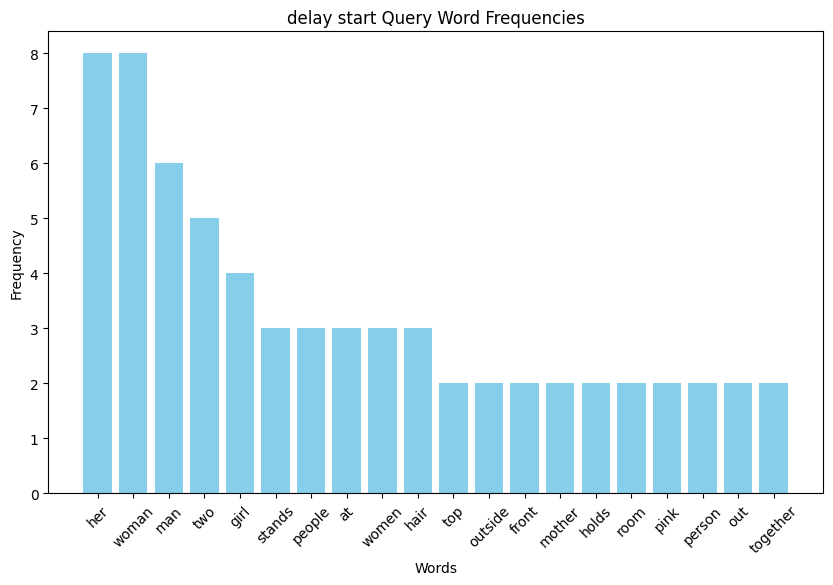

In [116]:
## 根据qids画出词频图
# 定义停用词
stop_words = set(["the", "and", "in", "of", "to", "a", "is", "on", "for", "with", "that", "this", "it", "as", "are", "by", "an"])

def find_query_by_qids(filename, qids, stop_words):
    queries = []
    with open(filename, 'r', encoding='utf-8') as file:
        for line in file:
            data = json.loads(line)
            if data['qid'] in qids:
                # 去除标点符号和转换为小写
                query = data['query'].lower().translate(str.maketrans('', '', string.punctuation))
                queries.extend([word for word in query.split() if word not in stop_words])
    return queries

def plot_word_frequencies(words, title):
    # 计算词频
    word_counts = Counter(words)
    most_common = word_counts.most_common(20)  # 取频率最高的20个词

    # 绘制条形图
    plt.figure(figsize=(10, 6))
    plt.bar(*zip(*most_common), color='skyblue')
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.title(title)
    plt.xticks(rotation=45)
    plt.show()


x = find_query_by_qids('data/highlight_val_release.jsonl', er_qids, stop_words)    
y = find_query_by_qids('data/highlight_val_release.jsonl', de_qids, stop_words)

plot_word_frequencies(x, 'eraly start Query Word Frequencies')
plot_word_frequencies(y, 'delay start Query Word Frequencies')

In [124]:
## 找出终点的偏移在一定范围的qids，并计数
def find_st_offset_qids(submission, ground_truth, offset_range = 3, x = 1):
    predx_qid2window = {d["qid"]: d["pred_relevant_windows"][x-1][:2] for d in submission}  # 第x个预测

    gt_qid2window = {}
    pred_qid2window = {}
    i = 0
    j = 0
    k = 0
    er_qids = []
    de_qids = []

    for d in ground_truth:
        cur_gt_windows = d["relevant_windows"]
        cur_qid = d["qid"]

        cur_max_iou_idx = 0
        if len(cur_gt_windows) > 0:  # select the GT window that has the highest IoU
            cur_xious = compute_temporal_iou_batch_cross(
                np.array([predx_qid2window[cur_qid]]), np.array(d["relevant_windows"])
            )[0]
            cur_max_iou_idx = np.argmax(cur_xious)
            cur_iou = cur_xious[0][cur_max_iou_idx]

            pred_qid2window[cur_qid] = predx_qid2window[cur_qid]
            gt_qid2window[cur_qid] = cur_gt_windows[cur_max_iou_idx]

            if offset_range - 2 <= predx_qid2window[cur_qid][1] - cur_gt_windows[cur_max_iou_idx][1] <= offset_range and cur_iou >= 0.7:
                i += 1
                er_qids.append(cur_qid)
            
            if offset_range - 2 <= cur_gt_windows[cur_max_iou_idx][1] - predx_qid2window[cur_qid][1] <= offset_range and cur_iou >= 0.7:
                k += 1
                de_qids.append(cur_qid)
            j += 1
    return i, k, j, er_qids, de_qids

i, k, j , er_qids, de_qids= find_st_offset_qids(pred_data, gt_data, offset_range = 3, x = 1)
print(f"{i}/{j}={100*i/j}%, {er_qids}")
print(f"{k}/{j}={100*k/j}%, {de_qids}")

72/1550=4.645161290322581%, [6223, 721, 7547, 5257, 548, 9277, 5239, 5437, 5049, 8065, 4987, 4409, 3007, 370, 8650, 4266, 10033, 6797, 5623, 10103, 5198, 5152, 8419, 2647, 3194, 2202, 7981, 8747, 10192, 8606, 2587, 3003, 7601, 9664, 8457, 8152, 9703, 1054, 1830, 6519, 522, 4713, 4974, 6267, 854, 1919, 1211, 7001, 4485, 5772, 765, 5394, 7783, 3277, 2834, 3888, 10160, 8470, 5606, 6966, 1377, 5335, 589, 2795, 4326, 6511, 3370, 6209, 10283, 5697, 8791, 8420]
191/1550=12.32258064516129%, [8056, 2343, 9760, 8014, 3525, 4508, 2276, 3739, 4854, 2960, 8187, 942, 4548, 2132, 7924, 5084, 5688, 2583, 6117, 9619, 5651, 5168, 3350, 4957, 2220, 4738, 4178, 6729, 4831, 601, 1805, 4495, 5277, 4295, 3254, 2448, 7454, 1875, 5407, 5406, 4097, 3028, 9216, 9657, 9157, 7787, 5375, 4457, 3005, 1616, 1021, 7477, 919, 1052, 7830, 1115, 10091, 7629, 9590, 3279, 3796, 389, 7014, 10176, 321, 4230, 5513, 4972, 5058, 6383, 6809, 3666, 10226, 536, 8266, 1855, 6634, 7746, 9903, 2217, 7836, 3733, 7670, 1783, 6543, 7066

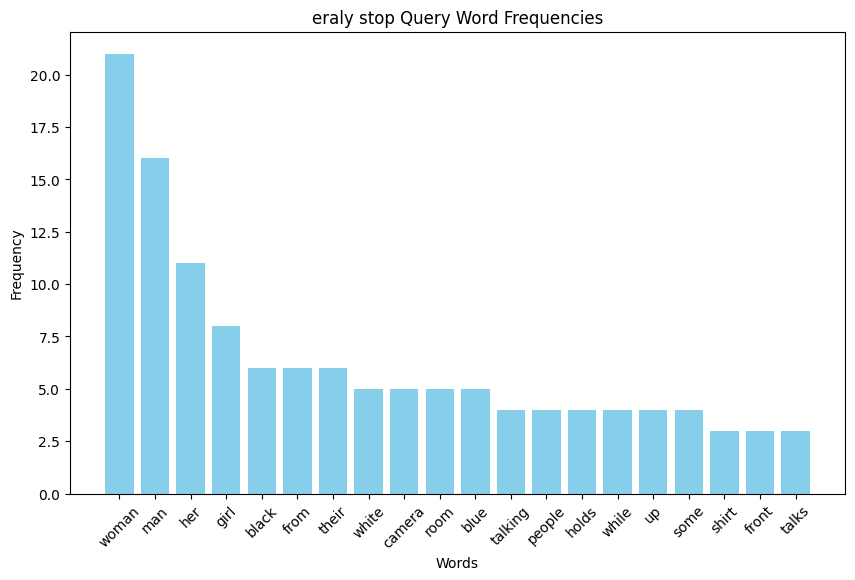

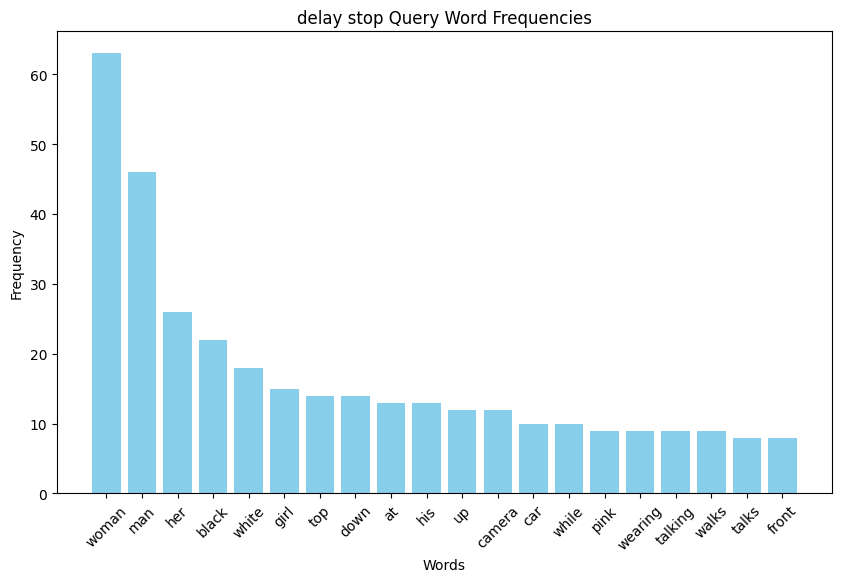

In [118]:
x = find_query_by_qids('data/highlight_val_release.jsonl', er_qids, stop_words)    
y = find_query_by_qids('data/highlight_val_release.jsonl', de_qids, stop_words)

plot_word_frequencies(x, 'eraly stop Query Word Frequencies')
plot_word_frequencies(y, 'delay stop Query Word Frequencies')

# 3.4

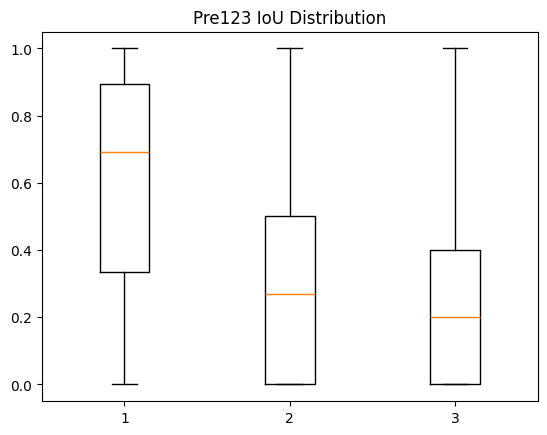

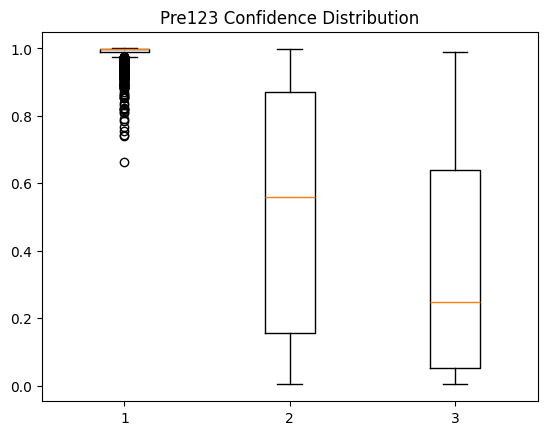

In [12]:
# 统计一选二选三选的iou分布
def compute_iou_distribution(submission, ground_truth, x = 1, y = 2, z = 3):
    predx_qid2window = {d["qid"]: d["pred_relevant_windows"][x-1] for d in submission}  # 第x个预测
    predy_qid2window = {d["qid"]: d["pred_relevant_windows"][y-1] for d in submission}  # 第y个预测
    predz_qid2window = {d["qid"]: d["pred_relevant_windows"][z-1] for d in submission}  # 第z个预测

    gt_qid2window = {}
    pred_qid2window = {}
    x_iou = []
    y_iou = []
    z_iou = []
    x_conf = []
    y_conf = []
    z_conf = []
    for d in ground_truth:
        cur_gt_windows = d["relevant_windows"]
        cur_qid = d["qid"]
        cur_max_iou_idx = 0
        if len(cur_gt_windows) > 0:
            cur_xious = compute_temporal_iou_batch_cross(
                np.array([predx_qid2window[cur_qid][:2]]), np.array(d["relevant_windows"])
            )[0]
            cur_max_iou_idx = np.argmax(cur_xious)
            x_iou.append(cur_xious[0][cur_max_iou_idx])
            x_conf.append(predx_qid2window[cur_qid][2])

            cur_max_iou_idx = 0
            cur_yious = compute_temporal_iou_batch_cross(
                np.array([predy_qid2window[cur_qid][:2]]), np.array(d["relevant_windows"])
            )[0]
            cur_max_iou_idx = np.argmax(cur_yious)
            y_iou.append(cur_yious[0][cur_max_iou_idx])
            y_conf.append(predy_qid2window[cur_qid][2])

            cur_max_iou_idx = 0
            cur_zious = compute_temporal_iou_batch_cross(
                np.array([predz_qid2window[cur_qid][:2]]), np.array(d["relevant_windows"])
            )[0]
            cur_max_iou_idx = np.argmax(cur_zious)
            z_iou.append(cur_zious[0][cur_max_iou_idx])
            z_conf.append(predz_qid2window[cur_qid][2])
    
    # 画出x_iou，y_iou箱线图 放在同一个图上
    import matplotlib.pyplot as plt
    
    plt.boxplot([x_iou, y_iou, z_iou])
    plt.title('Pre123 IoU Distribution')
    plt.show()
    # 画出x_conf，y_conf，z_conf箱线图 放在同一个图上
    plt.boxplot([x_conf, y_conf, z_conf])
    plt.title('Pre123 Confidence Distribution')
    plt.show()


compute_iou_distribution(pred_data, gt_data)


结果可视化：
    散点图
    横纵坐标分别为12选iou
    每个点为一个sample
    点的颜色表示confidence差值 越深值越小 conf1-conf2

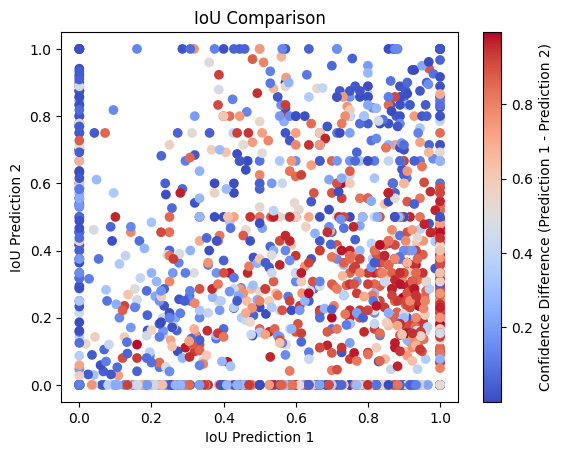

The number of points in left up region is: 142, 0.09161290322580645
The number of points in right up region is: 300, 0.1935483870967742
The number of points in right down region is: 172, 0.11096774193548387


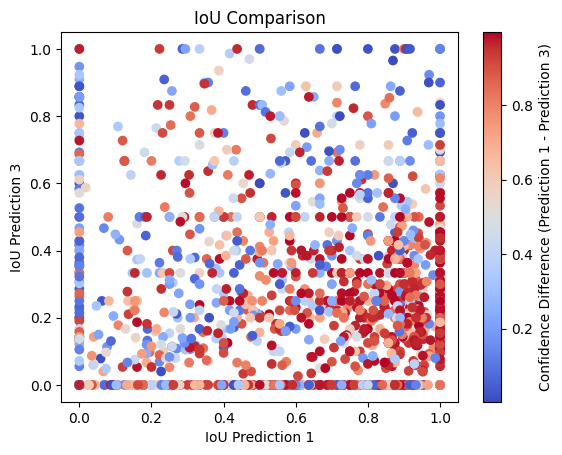

The number of points in left up region is: 114, 0.07354838709677419
The number of points in right up region is: 178, 0.11483870967741935
The number of points in right down region is: 172, 0.11096774193548387


In [8]:
import matplotlib.pyplot as plt

# Prepare the data
pred_qid2conf = {d['qid']:[d["pred_relevant_windows"][0][2:],d["pred_relevant_windows"][1][2:], d["pred_relevant_windows"][2][2:]] for d in pred_data}

def prepare_data(submission, ground_truth, x = 1, y = 2, z = 3):
    predx_qid2window = {d["qid"]: d["pred_relevant_windows"][x-1] for d in submission}  # 第x个预测
    predy_qid2window = {d["qid"]: d["pred_relevant_windows"][y-1] for d in submission}  # 第y个预测
    predz_qid2window = {d["qid"]: d["pred_relevant_windows"][z-1] for d in submission}  # 第z个预测
    pred_qid2iou = {}

    for d in ground_truth:
        cur_gt_windows = d["relevant_windows"]
        cur_qid = d["qid"]
        cur_max_iou_idx = 0
        if len(cur_gt_windows) > 0:  # select the GT window that has the highest IoU
            cur_xious = compute_temporal_iou_batch_cross(
                np.array([predx_qid2window[cur_qid][:2]]), np.array(d["relevant_windows"])
            )[0]
            cur_max_iou_idx = np.argmax(cur_xious)
            # pred_qid2window[cur_qid] = [predx_qid2window[cur_qid], predy_qid2window[cur_qid], predz_qid2window[cur_qid], cur_gt_windows[cur_max_iou_idx], cur_xious[0][cur_max_iou_idx]]
            pred_qid2iou[cur_qid] = [cur_xious[0][cur_max_iou_idx]]

            cur_max_iou_idx = 0
            cur_yious = compute_temporal_iou_batch_cross(
                np.array([predy_qid2window[cur_qid][:2]]), np.array(d["relevant_windows"])
            )[0]
            cur_max_iou_idx = np.argmax(cur_yious)
            pred_qid2iou[cur_qid].append(cur_yious[0][cur_max_iou_idx])

            cur_max_iou_idx = 0
            cur_zious = compute_temporal_iou_batch_cross(
                np.array([predz_qid2window[cur_qid][:2]]), np.array(d["relevant_windows"])
            )[0]
            cur_max_iou_idx = np.argmax(cur_zious)
            pred_qid2iou[cur_qid].append(cur_zious[0][cur_max_iou_idx])

    return pred_qid2iou

pred_qid2iou = prepare_data(pred_data, gt_data)

############################################################################################################
#### 统计一选二选的iou分布
x_iou = [item[0] for item in pred_qid2iou.values()]
y_iou = [item[1] for item in pred_qid2iou.values()]
conf_diff = [item[0][0] - item[1][0] for item in pred_qid2conf.values()]

plt.scatter(x_iou, y_iou, c=conf_diff, cmap='coolwarm')
plt.xlabel('IoU Prediction 1')
plt.ylabel('IoU Prediction 2')
plt.title('IoU Comparison')
plt.colorbar(label='Confidence Difference (Prediction 1 - Prediction 2)')
plt.show()

# 定义区域的边界
x_min = 0
x_max = 0.5
y_min = 0.5
y_max = 1

# 使用条件筛选，找出位于指定区域内的点
filtered_points1 = [(x, y) for x, y in zip(x_iou, y_iou) if x_min <= x <= x_max and y_min <= y <= y_max]
filtered_points2 = [(x, y) for x, y in zip(x_iou, y_iou) if 0.5 <= x <= 1 and 0.5 <= y <= 1]
filtered_points3 = [(x, y) for x, y in zip(x_iou, y_iou) if 0 <= x <= 0 and 0 <= y <= 1]

# 计算筛选后的点的数量
num_points1 = len(filtered_points1)
num_point2 = len(filtered_points2)
num_point3 = len(filtered_points3)

# 打印结果
print(f"The number of points in left up region is: {num_points1}, {num_points1/len(x_iou)}")
print(f"The number of points in right up region is: {num_point2}, {num_point2/len(x_iou)}")
print(f"The number of points in right down region is: {num_point3}, {num_point3/len(x_iou)}")

############################################################################################################
##### 统计一选三选的iou分布
x_iou = [item[0] for item in pred_qid2iou.values()]
y_iou = [item[2] for item in pred_qid2iou.values()]
conf_diff = [item[0][0] - item[2][0] for item in pred_qid2conf.values()]

plt.scatter(x_iou, y_iou, c=conf_diff, cmap='coolwarm')
plt.xlabel('IoU Prediction 1')
plt.ylabel('IoU Prediction 3')
plt.title('IoU Comparison')
plt.colorbar(label='Confidence Difference (Prediction 1 - Prediction 3)')
plt.show()

# 定义区域的边界
x_min = 0
x_max = 0.5
y_min = 0.5
y_max = 1

# 使用条件筛选，找出位于指定区域内的点
filtered_points1 = [(x, y) for x, y in zip(x_iou, y_iou) if x_min <= x <= x_max and y_min <= y <= y_max]
filtered_points2 = [(x, y) for x, y in zip(x_iou, y_iou) if 0.5 <= x <= 1 and 0.5 <= y <= 1]
filtered_points3 = [(x, y) for x, y in zip(x_iou, y_iou) if 0 <= x <= 0 and 0 <= y <= 1]
# 计算筛选后的点的数量
num_points1 = len(filtered_points1)
num_point2 = len(filtered_points2)
num_point3 = len(filtered_points3)
 
# 打印结果
print(f"The number of points in left up region is: {num_points1}, {num_points1/len(x_iou)}")
print(f"The number of points in right up region is: {num_point2}, {num_point2/len(x_iou)}")
print(f"The number of points in right down region is: {num_point3}, {num_point3/len(x_iou)}")



## 尝试分离特殊failure case

### 预处理

In [ ]:
### 读取预测和gt数据
import numpy as np
import json
from standalone_eval.utils import compute_average_precision_detection, \
    compute_temporal_iou_batch_cross, compute_temporal_iou_batch_paired, load_jsonl, get_ap

def read_jsonl(file_path):
    with open(file_path, 'r') as file:
        return [json.loads(line) for line in file]
    
def negative_qid(submission, ground_truth, iou_thds=np.linspace(0.3, 0.95, 14)):
    """If a predicted segment has IoU >= iou_thd with one of the 1st GT segment, we define it positive"""
    iou_thds = [float(f"{e:.2f}") for e in iou_thds]
    pred_qid2window = {d["qid"]: d["pred_relevant_windows"][0][:2] for d in submission}  # :2 rm scores
    gt_qid2window = {}
    negative_qids = {str(thd): [] for thd in iou_thds}  # Initialize an empty list for each IoU threshold
    for d in ground_truth:
        cur_gt_windows = d["relevant_windows"]
        cur_qid = d["qid"]
        cur_max_iou_idx = 0
        if len(cur_gt_windows) > 0:  # select the GT window that has the highest IoU
            cur_ious = compute_temporal_iou_batch_cross(
                np.array([pred_qid2window[cur_qid]]), np.array(d["relevant_windows"])
            )[0]
            cur_max_iou_idx = np.argmax(cur_ious)
        gt_qid2window[cur_qid] = cur_gt_windows[cur_max_iou_idx]

    qids = list(pred_qid2window.keys())
    pred_windows = np.array([pred_qid2window[k] for k in qids]).astype(float)
    gt_windows = np.array([gt_qid2window[k] for k in qids]).astype(float)
    pred_gt_iou = compute_temporal_iou_batch_paired(pred_windows, gt_windows)

    for thd in iou_thds:
        negative_qids[str(thd)] = [qids[i] for i in range(len(qids)) if pred_gt_iou[i] < thd]

    return negative_qids

def categorize_qids_by_iou(submission, ground_truth):
    """Categorize qids based on their IoU values into different ranges."""
    pred_qid2window = {d["qid"]: d["pred_relevant_windows"][0][:2] for d in submission}
    gt_qid2window = {}
    iou_ranges = {(i/10, (i+1)/10): [] for i in range(10)}  # Create IoU ranges

    for d in ground_truth:
        cur_gt_windows = d["relevant_windows"]
        cur_qid = d["qid"]
        cur_max_iou_idx = 0
        if len(cur_gt_windows) > 0:
            cur_ious = compute_temporal_iou_batch_cross(
                np.array([pred_qid2window[cur_qid]]), np.array(d["relevant_windows"])
            )[0]
            cur_max_iou_idx = np.argmax(cur_ious)
        gt_qid2window[cur_qid] = cur_gt_windows[cur_max_iou_idx]

    qids = list(pred_qid2window.keys())
    pred_windows = np.array([pred_qid2window[k] for k in qids]).astype(float)
    gt_windows = np.array([gt_qid2window[k] for k in qids]).astype(float)
    pred_gt_iou = compute_temporal_iou_batch_paired(pred_windows, gt_windows)

    for i, qid in enumerate(qids):
        iou = pred_gt_iou[i]
        for range_start, range_end in iou_ranges:
            if range_end == 1.0:
                if range_start <= iou <= range_end:
                    iou_ranges[(range_start, range_end)].append(qid)
                    break
            elif range_start <= iou < range_end:
                iou_ranges[(range_start, range_end)].append(qid)
                break

    return iou_ranges

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import os

def read_jsonl_Plot(file_path):
    data = {}
    with open(file_path, 'r') as file:
        for line in file:
            line_data = json.loads(line)
            data[line_data['qid']] = line_data
    return data

# Read the ground truth and prediction files for n
# QV
gt_data = read_jsonl('data/highlight_val_release.jsonl')
pred_data = read_jsonl('results/hl-video_tef-exp-332121-ndum_45-nprom_1_10/hl_val_submission.jsonl')
# n = negative_qid(pred_data, gt_data) # 小于各种iou的qids

# charades
# gt_data = read_jsonl('data/charades_sta/charades_sta_test_tvr_format.jsonl')
# pred_data = read_jsonl('results_charadesSTA/charadesSTA-video_tef-exp-332121-ndum_45-nprom_2_10/hl_test_submission.jsonl')  

# tacos
# gt_data = read_jsonl('data/tacos/test.jsonl')
# pred_data = read_jsonl('results_tacos/tacos-video_tef-exp-332121-ndum_50-nprom_2_10/MR_test_submission.jsonl')

## 找出每段iou范围内的qids
n = categorize_qids_by_iou(pred_data, gt_data)

# Read the ground truth and prediction files for plotting
# QV
Pred_data_plot = read_jsonl_Plot('results/hl-video_tef-exp-332121-ndum_45-nprom_1_10/hl_val_submission.jsonl')
GT_data_plot = read_jsonl_Plot('data/highlight_val_release.jsonl')

# charades
# Pred_data_plot = read_jsonl_Plot('results_charadesSTA/charadesSTA-video_tef-exp-332121-ndum_45-nprom_2_10/hl_test_submission.jsonl')
# GT_data_plot = read_jsonl_Plot('data/charades_sta/charades_sta_test_tvr_format.jsonl')

# tacos
# Pred_data_plot = read_jsonl_Plot('results_tacos/tacos-video_tef-exp-332121-ndum_50-nprom_2_10/MR_test_submission.jsonl')
# GT_data_plot = read_jsonl_Plot('data/tacos/test.jsonl')
n

In [6]:
# 准备数据
# 将验证集的预测值和gt准备整合到一个文件中
# 需要变成一个array，每一行是一个qid，每一列是若干个预测值和gt
import numpy as np
import pandas as pd

"""
key: qid
value: [predx w/ conf, predy w/ conf, predz w/ conf, gt, x_iou, y_iou, z_iou]
       [predx w/ conf, predy w/ conf, predz w/ conf, ...]
"""

def prepare_data(submission, ground_truth, x = 1, y = 2, z = 3):
    predx_qid2window = {d["qid"]: d["pred_relevant_windows"][x-1] for d in submission}  # 第x个预测
    predy_qid2window = {d["qid"]: d["pred_relevant_windows"][y-1] for d in submission}  # 第y个预测
    predz_qid2window = {d["qid"]: d["pred_relevant_windows"][z-1] for d in submission}  # 第z个预测

    # gt_qid2window = {}
    pred_qid2window = {}
    for d in ground_truth:
        cur_gt_windows = d["relevant_windows"]
        cur_qid = d["qid"]
        cur_max_iou_idx = 0
        if len(cur_gt_windows) > 0:  # select the GT window that has the highest IoU
            cur_xious = compute_temporal_iou_batch_cross(
                np.array([predx_qid2window[cur_qid][:2]]), np.array(d["relevant_windows"])
            )[0]
            cur_max_iou_idx = np.argmax(cur_xious)
            # pred_qid2window[cur_qid] = [predx_qid2window[cur_qid], predy_qid2window[cur_qid], predz_qid2window[cur_qid], cur_gt_windows[cur_max_iou_idx], cur_xious[0][cur_max_iou_idx]]
            pred_qid2window[cur_qid] = [predx_qid2window[cur_qid], predy_qid2window[cur_qid], predz_qid2window[cur_qid]]

            # cur_max_iou_idx = 0
            # cur_yious = compute_temporal_iou_batch_cross(
            #     np.array([predy_qid2window[cur_qid][:2]]), np.array(d["relevant_windows"])
            # )[0]
            # cur_max_iou_idx = np.argmax(cur_yious)
            # pred_qid2window[cur_qid].append(cur_yious[0][cur_max_iou_idx])

            # cur_max_iou_idx = 0
            # cur_zious = compute_temporal_iou_batch_cross(
            #     np.array([predz_qid2window[cur_qid][:2]]), np.array(d["relevant_windows"])
            # )[0]
            # cur_max_iou_idx = np.argmax(cur_zious)
            # pred_qid2window[cur_qid].append(cur_zious[0][cur_max_iou_idx])


    return pred_qid2window

# 根据qids给data中每个qid打上标签1
def label_qids(qids, data):
    for key in data.keys():
        if key in qids:
            data[key].append(1)
        else:
            data[key].append(0)
    return data

# 数据包含预测值的前三个窗口
# data = prepare_data(pred_data, gt_data)

# 或者包含所有的预测窗口
data = predx_qid2window = {d["qid"]: d["pred_relevant_windows"] for d in pred_data}

data = label_qids(qids, data)
data_list = [v for k, v in data.items()]

# 展平每个列表
flattened_data = []
for sublist in data_list:
    flattened_sublist = []
    for item in sublist:
        if isinstance(item, list):
            flattened_sublist.extend(item)
        else:
            flattened_sublist.append(item)
    flattened_data.append(flattened_sublist)

# 创建NumPy数组
# np_array = np.array(flattened_data)

# 创建DataFrame
df = pd.DataFrame(flattened_data)

## 对数据进行标准化
from sklearn.preprocessing import StandardScaler
# 创建标准化器
scaler = StandardScaler()
# 拟合和转换数据列（不包括标签列）
# np_array = scaler.fit_transform(df.iloc[:, :-1])
np_array = df.iloc[:, :-1]
np_array

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,102.0,150.0,0.9990,96.0,112.0,0.1931,138.0,150.0,0.0659,106.0,...,0.0009,68.0,88.0,0.0009,18.0,28.0,0.0007,26.0,40.0,0.0006
1,116.0,136.0,0.9997,132.0,140.0,0.0081,118.0,124.0,0.0081,122.0,...,0.0006,84.0,100.0,0.0006,30.0,44.0,0.0005,22.0,30.0,0.0005
2,98.0,150.0,0.9992,56.0,74.0,0.9504,96.0,106.0,0.0782,138.0,...,0.0017,36.0,54.0,0.0011,20.0,32.0,0.0009,24.0,34.0,0.0008
3,20.0,60.0,0.7433,14.0,92.0,0.6066,44.0,66.0,0.5332,66.0,...,0.3445,2.0,120.0,0.3136,116.0,150.0,0.2741,4.0,142.0,0.1595
4,78.0,98.0,0.9991,78.0,86.0,0.1061,100.0,110.0,0.0670,90.0,...,0.0010,24.0,30.0,0.0006,32.0,44.0,0.0006,24.0,30.0,0.0005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1545,2.0,22.0,0.9648,14.0,24.0,0.8423,54.0,150.0,0.8394,46.0,...,0.5432,24.0,30.0,0.5076,0.0,146.0,0.4187,22.0,40.0,0.0244
1546,30.0,64.0,0.9960,90.0,100.0,0.9029,0.0,8.0,0.8656,92.0,...,0.1103,34.0,48.0,0.1054,6.0,106.0,0.0144,120.0,132.0,0.0101
1547,112.0,142.0,0.9976,138.0,150.0,0.7704,42.0,54.0,0.5733,98.0,...,0.0391,22.0,44.0,0.0322,82.0,90.0,0.0199,30.0,120.0,0.0045
1548,24.0,40.0,0.9989,34.0,42.0,0.2104,50.0,58.0,0.0448,14.0,...,0.0072,82.0,94.0,0.0022,138.0,150.0,0.0011,128.0,140.0,0.0010


In [4]:
## Kmeans聚类
from sklearn.cluster import KMeans
k = 5
# 创建KMeans模型
kmeans = KMeans(n_clusters=k, random_state=1)
# 训练模型
kmeans.fit(np_array)
# 预测簇标签
labels = kmeans.predict(np_array)
# 创建预测DataFrame
df1 = pd.DataFrame({'labels': labels, 'qids': list(data.keys())})
# 显示每个簇与gt为1的交集的数量和比例
for i in range(k):
    print(df1[df1['labels'] == i].shape[0], len(set(df1[df1['labels'] == i]['qids']) & set(qids)), len(set(df1[df1['labels'] == i]['qids']) & set(qids))/df1[df1['labels'] == i].shape[0])


NameError: name 'np_array' is not defined

In [1]:
import torch
print(torch.__version__)


2.2.0


In [7]:
import torch
import torch.nn as nn
encoder_layer = nn.TransformerEncoderLayer(d_model=512, nhead=8)
transformer_encoder = nn.TransformerEncoder(encoder_layer, num_layers=6)
src = torch.rand(1, 31, 512)
out = transformer_encoder(src)
out.shape

torch.Size([1, 31, 512])

In [23]:
## 量化提升点（二三选正确率很高，一选接近或等于0的情况；）
def compute_case_ratio(submission, ground_truth, iou_thds=np.linspace(0.3, 0.95, 14), x = 2, y = 3, z = 1):
    predx_qid2window = {d["qid"]: d["pred_relevant_windows"][x-1][:2] for d in submission}  # 第x个预测
    predy_qid2window = {d["qid"]: d["pred_relevant_windows"][y-1][:2] for d in submission}  # 第y个预测
    predz_qid2window = {d["qid"]: d["pred_relevant_windows"][z-1][:2] for d in submission}  # 第z个预测
    
    gt_qid2window = {}
    pred_qid2window = {}
    i = 0
    j = 0
    qids = []
    for d in ground_truth:
        cur_gt_windows = d["relevant_windows"]
        cur_qid = d["qid"]
        # x
        curx_max_iou_idx = 0
        if len(cur_gt_windows) > 0:  # select the GT window that has the highest IoU
            cur_xious = compute_temporal_iou_batch_cross(
                np.array([predx_qid2window[cur_qid]]), np.array(d["relevant_windows"])
            )[0]
            curx_max_iou_idx = np.argmax(cur_xious)
            cur_xiou = cur_xious[0][curx_max_iou_idx]
            # y
            cury_max_iou_idx = 0
            cur_yious = compute_temporal_iou_batch_cross(
                np.array([predy_qid2window[cur_qid]]), np.array(d["relevant_windows"])
            )[0]
            cury_max_iou_idx = np.argmax(cur_yious)
            cur_yiou = cur_yious[0][cury_max_iou_idx]
            # z
            curz_max_iou_idx = 0
            cur_zious = compute_temporal_iou_batch_cross(
                np.array([predz_qid2window[cur_qid]]), np.array(d["relevant_windows"])
            )[0]
            curz_max_iou_idx = np.argmax(cur_zious)
            cur_ziou = cur_zious[0][curz_max_iou_idx]
            
            # 找出xyz中最大的及其对应的gt
            max_iou = max(cur_xiou, cur_yiou, cur_ziou)
            pred_qid2window[cur_qid] = predx_qid2window[cur_qid] if max_iou == cur_xiou else predy_qid2window[cur_qid] if max_iou == cur_yiou else predz_qid2window[cur_qid]
            # 如果最大的iou出现在x或y，且z的iou接近0
            # if 0 <= cur_ziou <= 0:
            # if (cur_xiou >= 0.5 and cur_yiou >= 0.5) and cur_ziou <= 0:
            # if (cur_xiou >= 0.5 or cur_yiou >= 0.5) and cur_ziou <= 0:
            if cur_xiou == 0 :
                i += 1
                qids.append(cur_qid)
            j += 1

    return i, j, qids

i, j, qids= compute_case_ratio(pred_data, gt_data)
print(f"{i}/{j}={100*i/j}%, {qids}")

430/1550=27.741935483870968%, [781, 2343, 5612, 721, 2276, 342, 6083, 7484, 3001, 9796, 7735, 4875, 6213, 7002, 2433, 1961, 942, 8052, 1136, 5510, 9774, 8312, 6240, 298, 4707, 7940, 8193, 4758, 6807, 9692, 9899, 5331, 2043, 7285, 2253, 5688, 6831, 7861, 158, 228, 2798, 5587, 9619, 10254, 3573, 4468, 8008, 41, 7295, 6978, 898, 8967, 2800, 3622, 4738, 6282, 7277, 8263, 8425, 4029, 4719, 8108, 2363, 3077, 9119, 66, 7264, 9207, 9367, 8144, 9277, 8154, 8987, 601, 1813, 2364, 840, 3456, 561, 1891, 3064, 4235, 5266, 7691, 1571, 4973, 9471, 7367, 8792, 6798, 9035, 4671, 9267, 3864, 5437, 7627, 7846, 8730, 4226, 6139, 4310, 5029, 7028, 4303, 8691, 9667, 9284, 9954, 1183, 4617, 6480, 10269, 5364, 3307, 10050, 5469, 1616, 4900, 8650, 1021, 3026, 6571, 8314, 3811, 6266, 919, 8188, 2024, 4320, 8075, 9590, 3916, 5623, 934, 9579, 9987, 10103, 338, 8274, 3634, 7014, 2770, 8929, 9942, 222, 4157, 1671, 8681, 9885, 10056, 571, 1952, 1827, 4786, 8287, 5275, 8293, 9440, 5058, 9779, 7782, 9229, 1390, 3666, 

In [10]:
filtered_pred_qid2conf = {key: value for key, value in pred_qid2conf.items() if key in x}
filtered_pred_qid2conf

{3359: [[0.9816], [0.9631], [0.9349]],
 10029: [[0.9988], [0.7475], [0.5188]],
 5584: [[0.9914], [0.7867], [0.7757]],
 9899: [[0.9919], [0.9903], [0.985]],
 158: [[0.9849], [0.8348], [0.8006]],
 3603: [[0.9964], [0.5664], [0.2746]],
 7622: [[0.9979], [0.8584], [0.6741]],
 3378: [[0.985], [0.9658], [0.872]],
 7567: [[0.9993], [0.8234], [0.4245]],
 3864: [[0.9933], [0.9008], [0.6414]],
 6643: [[0.9759], [0.9169], [0.7913]],
 5914: [[0.9938], [0.9439], [0.7436]],
 853: [[0.9692], [0.9655], [0.8575]],
 7044: [[0.9918], [0.8498], [0.795]],
 5392: [[0.9841], [0.9712], [0.6567]],
 4608: [[0.9215], [0.7876], [0.7441]],
 3026: [[0.9832], [0.9774], [0.9594]],
 825: [[0.993], [0.9605], [0.6559]],
 3215: [[0.9786], [0.9665], [0.9609]],
 10289: [[0.9443], [0.8656], [0.777]],
 4219: [[0.9699], [0.968], [0.9205]],
 436: [[0.9848], [0.9593], [0.9241]],
 9283: [[0.985], [0.3036], [0.0645]],
 222: [[0.9901], [0.3472], [0.3225]],
 7432: [[0.9983], [0.9678], [0.1474]],
 8287: [[0.999], [0.1661], [0.1107]]

In [7]:
# '2或3>0.5,1=0' 
qids = [3359, 10029, 5584, 9899, 158, 3603, 7622, 3378, 7567, 3864, 6643, 5914, 853, 7044, 5392, 4608, 3026, 825, 3215, 10289, 4219, 436, 9283, 222, 7432, 8287, 6992, 3731, 2411, 10267, 8605, 8594, 2545, 5667, 5114, 7412, 3779, 6749, 7046, 8750, 6241, 5671, 9061, 9980, 625, 4785, 7745, 4934, 8478, 7654, 4314, 8675, 10006, 4240, 7271, 682, 532, 8294, 2967, 5986, 10137, 687, 4041, 10261, 4705, 617, 4969, 2768, 3088, 6587, 6625, 9028, 471, 6917, 8778, 9638, 6418, 7834, 9770, 2757, 1825, 5492]

# 1选iou为0
qids = [3359, 10029, 3403, 342, 5584, 6213, 7002, 4691, 8052, 4283, 8312, 298, 4707, 4758, 9899, 158, 3603, 8108, 7622, 9367, 3378, 4973, 9471, 8792, 9035, 7332, 7567, 3864, 6643, 5914, 7627, 853, 7061, 8401, 9954, 1183, 7044, 3307, 10050, 5392, 4608, 3026, 825, 3215, 10289, 4219, 8075, 1717, 436, 9283, 8661, 222, 7432, 9052, 8287, 4839, 4856, 6992, 3731, 2600, 3129, 5468, 2411, 10267, 8605, 3416, 3513, 9597, 8594, 9712, 7850, 2862, 2545, 5667, 5114, 6836, 580, 7188, 7412, 3779, 8560, 8220, 1859, 2969, 9214, 4099, 6749, 7046, 8750, 5304, 6241, 8821, 322, 7569, 5671, 1849, 9061, 9671, 9980, 625, 4785, 7745, 4934, 8478, 5246, 7654, 32, 2320, 4314, 1221, 1304, 8675, 10006, 9746, 4242, 2822, 4240, 7271, 682, 532, 3030, 8294, 2967, 5986, 2763, 4941, 10137, 5038, 9715, 8394, 6474, 9670, 687, 9212, 4041, 9633, 10261, 4705, 617, 4969, 2768, 9825, 5936, 3088, 6587, 6625, 9349, 7905, 4985, 9028, 471, 8841, 4164, 2887, 10053, 6917, 8778, 9638, 6418, 9058, 5787, 7834, 9770, 2757, 7389, 7504, 9358, 4543, 1825, 5541, 5492, 1761]

# 2选iou为0
qids = [781, 2343, 5612, 721, 2276, 342, 6083, 7484, 3001, 9796, 7735, 4875, 6213, 7002, 2433, 1961, 942, 8052, 1136, 5510, 9774, 8312, 6240, 298, 4707, 7940, 8193, 4758, 6807, 9692, 9899, 5331, 2043, 7285, 2253, 5688, 6831, 7861, 158, 228, 2798, 5587, 9619, 10254, 3573, 4468, 8008, 41, 7295, 6978, 898, 8967, 2800, 3622, 4738, 6282, 7277, 8263, 8425, 4029, 4719, 8108, 2363, 3077, 9119, 66, 7264, 9207, 9367, 8144, 9277, 8154, 8987, 601, 1813, 2364, 840, 3456, 561, 1891, 3064, 4235, 5266, 7691, 1571, 4973, 9471, 7367, 8792, 6798, 9035, 4671, 9267, 3864, 5437, 7627, 7846, 8730, 4226, 6139, 4310, 5029, 7028, 4303, 8691, 9667, 9284, 9954, 1183, 4617, 6480, 10269, 5364, 3307, 10050, 5469, 1616, 4900, 8650, 1021, 3026, 6571, 8314, 3811, 6266, 919, 8188, 2024, 4320, 8075, 9590, 3916, 5623, 934, 9579, 9987, 10103, 338, 8274, 3634, 7014, 2770, 8929, 9942, 222, 4157, 1671, 8681, 9885, 10056, 571, 1952, 1827, 4786, 8287, 5275, 8293, 9440, 5058, 9779, 7782, 9229, 1390, 3666, 7139, 2600, 9624, 9713, 967, 2240, 2988, 3129, 8977, 1047, 5468, 5923, 313, 2616, 329, 1532, 9381, 7959, 8605, 3416, 3513, 9220, 4763, 10209, 562, 4151, 5217, 8450, 9597, 10217, 3253, 544, 9712, 9816, 9056, 7850, 2217, 5762, 9653, 2862, 7294, 8774, 7670, 1342, 5330, 8382, 5114, 5374, 1386, 7066, 2126, 5687, 580, 7188, 8356, 210, 1894, 8066, 9077, 4959, 8220, 1800, 1859, 6431, 10082, 6824, 2969, 9304, 3852, 4099, 5958, 10063, 7046, 8676, 8821, 9703, 322, 2557, 6093, 5592, 1830, 4637, 8984, 3126, 6519, 5070, 1251, 7070, 2148, 1109, 1123, 5694, 728, 2274, 1004, 5730, 8182, 9671, 3355, 8204, 2758, 522, 4791, 7000, 8488, 9980, 625, 4713, 854, 1919, 252, 6980, 2277, 7724, 2611, 3566, 711, 4934, 7001, 5246, 588, 5775, 32, 4982, 5037, 8358, 2320, 507, 7174, 2205, 1221, 1304, 972, 9554, 9746, 4281, 2355, 3576, 6206, 237, 3851, 7348, 1842, 1836, 5394, 2208, 9510, 456, 3388, 2093, 3602, 965, 6778, 5783, 7783, 4370, 4673, 395, 5826, 1254, 1555, 2302, 6879, 2763, 738, 4181, 2160, 8239, 1632, 3770, 5388, 10137, 453, 5987, 6953, 9898, 10143, 8470, 9715, 9982, 8135, 1135, 3369, 6474, 2046, 9670, 4806, 7307, 5194, 6948, 4777, 4687, 9212, 1675, 4094, 9633, 9934, 5781, 617, 510, 3664, 9825, 4920, 8574, 9198, 353, 6113, 9045, 8147, 8395, 9349, 6511, 10104, 4985, 5985, 9171, 5004, 6646, 5699, 3880, 5243, 1925, 9724, 471, 8841, 2887, 10092, 10173, 472, 6917, 10283, 9714, 9906, 9949, 918, 7840, 8264, 775, 5652, 6518, 5490, 9058, 7957, 1715, 5156, 8454, 2450, 609, 4487, 7671, 5787, 6482, 5697, 6475, 9919, 7017, 7539, 239, 7203, 7504, 1045, 8099, 2133, 1761, 3992, 8420]


# 3.5

In [24]:
## 根据qids列表提取出对应的pdf页面生成一个新的PDF
from PyPDF2 import PdfReader, PdfWriter
import os

# 读取PDF文件
pdf_filename = 'results/hl-video_tef-exp-332121-ndum_45-nprom_1_10/result_visualization/result1.pdf'
pdf = PdfReader(pdf_filename)

# 选择要提取的页面
qids = [781, 2343, 5612, 721, 2276, 342, 6083, 7484, 3001, 9796, 7735, 4875, 6213, 7002, 2433, 1961, 942, 8052, 1136, 5510, 9774, 8312, 6240, 298, 4707, 7940, 8193, 4758, 6807, 9692, 9899, 5331, 2043, 7285, 2253, 5688, 6831, 7861, 158, 228, 2798, 5587, 9619, 10254, 3573, 4468, 8008, 41, 7295, 6978, 898, 8967, 2800, 3622, 4738, 6282, 7277, 8263, 8425, 4029, 4719, 8108, 2363, 3077, 9119, 66, 7264, 9207, 9367, 8144, 9277, 8154, 8987, 601, 1813, 2364, 840, 3456, 561, 1891, 3064, 4235, 5266, 7691, 1571, 4973, 9471, 7367, 8792, 6798, 9035, 4671, 9267, 3864, 5437, 7627, 7846, 8730, 4226, 6139, 4310, 5029, 7028, 4303, 8691, 9667, 9284, 9954, 1183, 4617, 6480, 10269, 5364, 3307, 10050, 5469, 1616, 4900, 8650, 1021, 3026, 6571, 8314, 3811, 6266, 919, 8188, 2024, 4320, 8075, 9590, 3916, 5623, 934, 9579, 9987, 10103, 338, 8274, 3634, 7014, 2770, 8929, 9942, 222, 4157, 1671, 8681, 9885, 10056, 571, 1952, 1827, 4786, 8287, 5275, 8293, 9440, 5058, 9779, 7782, 9229, 1390, 3666, 7139, 2600, 9624, 9713, 967, 2240, 2988, 3129, 8977, 1047, 5468, 5923, 313, 2616, 329, 1532, 9381, 7959, 8605, 3416, 3513, 9220, 4763, 10209, 562, 4151, 5217, 8450, 9597, 10217, 3253, 544, 9712, 9816, 9056, 7850, 2217, 5762, 9653, 2862, 7294, 8774, 7670, 1342, 5330, 8382, 5114, 5374, 1386, 7066, 2126, 5687, 580, 7188, 8356, 210, 1894, 8066, 9077, 4959, 8220, 1800, 1859, 6431, 10082, 6824, 2969, 9304, 3852, 4099, 5958, 10063, 7046, 8676, 8821, 9703, 322, 2557, 6093, 5592, 1830, 4637, 8984, 3126, 6519, 5070, 1251, 7070, 2148, 1109, 1123, 5694, 728, 2274, 1004, 5730, 8182, 9671, 3355, 8204, 2758, 522, 4791, 7000, 8488, 9980, 625, 4713, 854, 1919, 252, 6980, 2277, 7724, 2611, 3566, 711, 4934, 7001, 5246, 588, 5775, 32, 4982, 5037, 8358, 2320, 507, 7174, 2205, 1221, 1304, 972, 9554, 9746, 4281, 2355, 3576, 6206, 237, 3851, 7348, 1842, 1836, 5394, 2208, 9510, 456, 3388, 2093, 3602, 965, 6778, 5783, 7783, 4370, 4673, 395, 5826, 1254, 1555, 2302, 6879, 2763, 738, 4181, 2160, 8239, 1632, 3770, 5388, 10137, 453, 5987, 6953, 9898, 10143, 8470, 9715, 9982, 8135, 1135, 3369, 6474, 2046, 9670, 4806, 7307, 5194, 6948, 4777, 4687, 9212, 1675, 4094, 9633, 9934, 5781, 617, 510, 3664, 9825, 4920, 8574, 9198, 353, 6113, 9045, 8147, 8395, 9349, 6511, 10104, 4985, 5985, 9171, 5004, 6646, 5699, 3880, 5243, 1925, 9724, 471, 8841, 2887, 10092, 10173, 472, 6917, 10283, 9714, 9906, 9949, 918, 7840, 8264, 775, 5652, 6518, 5490, 9058, 7957, 1715, 5156, 8454, 2450, 609, 4487, 7671, 5787, 6482, 5697, 6475, 9919, 7017, 7539, 239, 7203, 7504, 1045, 8099, 2133, 1761, 3992, 8420]
pages_to_extract = [pdf.pages[i] for i in range(len(pdf.pages)) if int(pdf.pages[i].extract_text().split(' ')[-1]) in qids]
if len(pages_to_extract) == 430:
    # 创建一个新的PDF文件
    output_pdf_filename = 'results/hl-video_tef-exp-332121-ndum_45-nprom_1_10/result_visualization/2iou=0_result.pdf'
    pdf_writer = PdfWriter()
    for page in pages_to_extract:
        pdf_writer.add_page(page)
    pdf_writer.write(output_pdf_filename)

# 3.6



In [ ]:

class SAMMIMIC(nn.Module):
    def __init__(self, transformer, position_embed, txt_position_embed, txt_dim, vid_dim,
                 num_queries, input_dropout, aux_loss=False,
                 contrastive_align_loss=False, contrastive_hdim=64,
                 max_v_l=75, span_loss_type="l1", use_txt_pos=False, n_input_proj=2, aud_dim=0, args=None):        
        super().__init__()
        self.transformer = transformer
        self.position_embed = position_embed
        self.txt_position_embed = txt_position_embed
        self.txt_dim = txt_dim
        self.vid_dim = vid_dim
        self.num_queries = num_queries
        self.input_dropout = input_dropout
        self.aux_loss = aux_loss
        self.contrastive_align_loss = contrastive_align_loss
        self.contrastive_hdim = contrastive_hdim
        self.max_v_l = max_v_l
        self.span_loss_type = span_loss_type
        self.use_txt_pos = use_txt_pos
        self.n_input_proj = n_input_proj
        self.aud_dim = aud_dim
        self.args = args

        # Video Transformer Encoder
        self.video_encoder_layer = TransformerEncoderLayer(d_model=vid_dim, nhead=args.nhead, dropout=args.dropout)
        self.video_encoder = TransformerEncoder(self.video_encoder_layer, num_layers=args.num_encoder_layers)

        # Text Transformer Encoder
        self.text_encoder_layer = TransformerEncoderLayer(d_model=txt_dim, nhead=args.nhead, dropout=args.dropout)
        self.text_encoder = TransformerEncoder(self.text_encoder_layer, num_layers=args.num_encoder_layers)

        # Transformer Decoder
        self.decoder_layer = TransformerDecoderLayer(d_model=vid_dim, nhead=args.nhead, dropout=args.dropout)
        self.decoder = TransformerDecoder(self.decoder_layer, num_layers=args.num_decoder_layers)

        # Project video and text input to the same hidden dimension
        self.video_input_proj = nn.Linear(vid_dim, args.hidden_dim)
        self.text_input_proj = nn.Linear(txt_dim, args.hidden_dim)

    def forward(self, src_txt, src_txt_mask, src_vid, src_vid_mask, vid, qid, src_aud=None, src_aud_mask=None, targets=None):
        # Project inputswo tensors:
        src_vid = self.video_input_proj(src_vid)
        src_txt = self.text_input_proj(src_txt)

        # Add position embeddings
        src_vid = src_vid + self.position_embed(src_vid_mask)
        src_txt = src_txt + self.txt_position_embed(src_txt_mask)

        # Pass through the encoders
        video_memory = self.video_encoder(src_vid)
        text_memory = self.text_encoder(src_txt)

        # Decoder (cross attention between text query and video key/value)
        output = self.decoder(tgt=text_memory, memory=video_memory)

        if targets is not None:
            # Compute loss
            loss = self.criterion(output, targets)
            return output, loss
        else:
            return output


In [2]:
## 检查npz文件的形状
import numpy as np
npz = np.load('features/qvhighlight/clip_features/_-5vXZfppKE_60.0_210.0.npz')
npz
# npz['features'].shape

NpzFile 'features/qvhighlight/clip_features/_-5vXZfppKE_60.0_210.0.npz' with keys: features

qvhighlight/slowfast_features shape：(66, 2304)
qvhighlight/clip_text_features shape: (512,)
qvhighlight/clip_features shape: (65, 512)

In [ ]:
class SAMmimicModel(nn.Module):
    def __init__(self, video_dim, text_dim, hidden_dim, nhead, num_encoder_layers, num_decoder_layers, dropout=0.1):
        super(SAMmimicModel, self).__init__()
        
        # Video Transformer Encoder
        self.video_encoder_layer = TransformerEncoderLayer(d_model=hidden_dim, nhead=nhead, dropout=dropout)
        self.video_encoder = TransformerEncoder(self.video_encoder_layer, num_layers=num_encoder_layers)
        
        # Text Transformer Encoder
        self.text_encoder_layer = TransformerEncoderLayer(d_model=hidden_dim, nhead=nhead, dropout=dropout)
        self.text_encoder = TransformerEncoder(self.text_encoder_layer, num_layers=num_encoder_layers)
        
        # Transformer Decoder
        self.decoder_layer = TransformerDecoderLayer(d_model=hidden_dim, nhead=nhead, dropout=dropout)
        self.decoder = TransformerDecoder(self.decoder_layer, num_layers=num_decoder_layers)
        
        # Project video and text input to the same hidden dimension
        self.video_input_proj = nn.Linear(video_dim, hidden_dim)
        self.text_input_proj = nn.Linear(text_dim, hidden_dim)
        
    def forward(self, src_video, src_video_pos, src_text, src_text_pos):
        # Project inputs
        src_video = self.video_input_proj(src_video)
        src_text = self.text_input_proj(src_text)
        
        # Add position embeddings
        src_video = src_video + src_video_pos
        src_text = src_text + src_text_pos

        # Pass through the encoders
        video_memory = self.video_encoder(src_video)
        text_memory = self.text_encoder(src_text)
        
        # Decoder (cross attention between text query and video key/value)
        output = self.decoder(tgt=text_memory, memory=video_memory)
        return output


# 3.7

In [4]:
import numpy as np
npz = np.load('features/qvhighlight/slowfast_features/_0EdHKxcRHM_60.0_210.0.npz')
npz
# npz['features'].shape

NpzFile 'features/qvhighlight/slowfast_features/_0EdHKxcRHM_60.0_210.0.npz' with keys: features

In [9]:
import numpy as np
npz = np.load('features/qvhighlight/clip_text_features/qid10304.npz')
npz
npz['pooler_output'].shape

(512,)

In [11]:
import numpy as np
npz = np.load('features/qvhighlight/clip_text_features/qid10308.npz')
npz
npz['last_hidden_state'].shape

(10, 512)

In [ ]:
dict_keys(['pred_logits' = None, 'pred_spans' = , 'saliency_scores_neg', 'src_txt_mask_neg', 't2vattnvalues_neg',/
            'real_neg_mask', 'saliency_scores', 'memory_moment', 'nmmemory_moment', 'sentence_txt',/
            'sentence_dummy', 'moment2txt_similarity', 'nmoment2txt_similarity', 'cate_attn_weights', /
            'moment_mask', 'txt_mask', 't2vattnvalues', 'dummy_tokens', 'global_rep_tokens', 'src_vid', /
            'video_mask', 'aux_outputs'])

查decoder文档

moment_detr
dict_keys(['pred_logits', 'pred_spans', 'saliency_scores', 'aux_outputs'])


# 3.8

$\mathcal{L}_{obj} = \mathcal{L}_{mr} + \lambda_{hl} (\mathcal{L}_{hl} + \mathcal{L}_{attn} + \mathcal{L}_{bce}) + \lambda_{ortho} \mathcal{L}_{ortho} + \lambda_{align} \mathcal{L}_{align} + \lambda_{distill} \mathcal{L}_{distill}$


"loss_span": args.span_loss_coef, 10
"loss_giou": args.giou_loss_coef, 1
"loss_label": args.label_loss_coef, 4

"loss_saliency": args.lw_saliency, 1
"loss_orthogonal_dummy":args.lw_distill, 1 
"loss_ms_align": args.lw_ms_align, 1
"loss_distill": args.lw_distill, 1


bash cg_detr/scripts/train.sh --lw_saliency 0 --exp_id exp1; bash cg_detr/scripts/train.sh --lw_distill 0 --exp_id exp2; bash cg_detr/scripts/train.sh --lw_ms_align 0 --exp_id exp3

bash cg_detr/scripts/train.sh --span_loss_coef 0; bash cg_detr/scripts/train.sh --giou_loss_coef 0; bash cg_detr/scripts/train.sh --label_loss_coef 0

$\text{MultiHead}(Q, K, V) = \text{Concat}(head_1,\dots,head_h)W^O$

$\text{where} head_i = \text{Attention}(QW_i^Q, KW_i^K, VW_i^V)$